In [1]:
from __future__ import division, print_function, unicode_literals

import math
import re
import sys
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import scipy
import IPython
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split

import os
import tarfile
import urllib
import pickle

import joblib

import warnings

warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
from importlib import reload

from clintraj_qi import *
from clintraj_optiscale import *
from clintraj_eltree import *
from clintraj_util import *
import scipy.stats

C:\Users\mikha\anaconda3\lib\site-packages\cupy\_environment.py:205: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\mikha\anaconda3\lib\site-packages\cupy\_environment.py:205: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\mikha\anaconda3\lib\site-packages\cupy\_environment.py:205: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\mikha\anaconda3\lib\site-packages\cupy\_environment.py:205: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [3]:
def save_obj(obj, name):
    os.makedirs("obj/Analysis", exist_ok=True)
    with open('obj/Analysis/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_obj(name):
    with open('obj/Analysis/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
data = pd.read_csv("data/procedures.csv", index_col='Index')
data

,Full name,Date of birth,Age,Sex,Date of enter,Code of diagnosis,Diagnosis,Additional diagnoses,D-dimer,Urea,Creatinine,CRP,Date of operation,Code of operation,Operation,Duration (min),Ultrasound of veins a/o
Index,,,,,,,,,,,,,,,,,
1,ВЯЗКОВ МИХАИЛ ЕВГЕНЬЕВИЧ,17.10.14,7,мужской,27.10.21,M95.8,Деформация головки левой бедренной кости на фо...,NaN,NaN,3.40,55.0,NaN,01.11.21,Z84.99,Коррекция положения фиксирующих спиц в крыле л...,15,NaN
2,МОЛОФЕЕВА НИНА НИКОЛАЕВНА,30.07.54,67,женский,29.10.21,M17.1,Правосторонний гонартроз III ст. с варусной д...,"Гипертоническая болезнь II стадии ,контролируе...",355.0,NaN,NaN,NaN,01.11.21,Z81.41,Эндопротезирование правого коленного сустава с...,100,Не выявлено
3,ЯШИНА ТАТЬЯНА МИХАЙЛОВНА,31.01.56,65,женский,29.10.21,M17.1,Правосторонний гонартроз III ст. с выраженной ...,Варикозная болезнь вен правой нижней конечност...,253.0,6.00,89.0,NaN,01.11.21,Z81.41,Эндопротезирование правого коленного сустава N...,85,Не выявлено
4,РАВЗУТДИНОВА ГУЛЬСАРА СОЛТАНОВНА,06.05.62,59,женский,29.10.21,M51.1,Остеохондроз поясничного отдела позвоночника. ...,Варикозная болезнь вен нижних конечностей без...,1228.0,NaN,NaN,NaN,01.11.21,Z80.59,Биполярная радиочастоная черезкожная нуклеопла...,25,NaN
5,РОМАНОВ СЕРГЕЙ ГЕРАРДОВИЧ,05.12.59,61,мужской,29.10.21,S72.1,Закрытый чрезвертельный перелом левой бедренно...,"Хронический бронхит, вне обострения.*",2581.0,NaN,NaN,NaN,01.11.21,Z81.53,Тотальное цеметное эндопротезирование левого ...,60,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,ГОРДЕЕВ ЮРИЙ ИВАНОВИЧ,06.06.70,51,мужской,31.01.22,M17.3,Левосторонний посттравматический гонартроз I с...,Варикозная болезнь вен нижних конечностей. Сос...,423.0,NaN,NaN,NaN,31.01.22,Z80.26,Артроскопическая пластика передней крестообра...,95,Не выявлено
1791,ФОМИН АЛЕКСАНДР АНАТОЛЬЕВИЧ,16.05.82,39,мужской,31.01.22,M51.1,Грыжа диска L5-S1. Вертеброгенный болевой синд...,Неатрофический гастрит. Эрозивный дуоденит. Ру...,162.0,3.60,82.0,NaN,31.01.22,Z80.50,Интерляминэктомия L5-S1 слева. Микрохирургичес...,30,Не выявлено
1792,АНИСИМОВА НИНА НИКОЛАЕВНА,10.04.51,70,женский,31.01.22,G56.0,Компрессионно-ишемическая невропатия срединног...,NaN,NaN,NaN,NaN,NaN,31.01.22,Z04.43,"Пластика карпальной связки левой кисти,невроли...",25,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794 entries, 1 to 1794
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Full name                1794 non-null   object 
 1   Date of birth            1794 non-null   object 
 2   Age                      1794 non-null   int64  
 3   Sex                      1794 non-null   object 
 4   Date of enter            1794 non-null   object 
 5   Code of diagnosis        1794 non-null   object 
 6   Diagnosis                1794 non-null   object 
 7   Additional diagnoses     1503 non-null   object 
 8   D-dimer                  1654 non-null   float64
 9   Urea                     425 non-null    float64
 10  Creatinine               435 non-null    float64
 11  CRP                      163 non-null    float64
 12  Date of operation        1794 non-null   object 
 13  Code of operation        1794 non-null   object 
 14  Operation               

## УЗИ

In [6]:
ultrasound_data = data['Ultrasound of veins a/o'].value_counts().sort_index()
ultrasound_data.name = 'Count'
ultrasound_data.index.name = 'Result'
ultrasound_data

Result
Не выявлено                                                                                                                                                                                                                                                                                              1015
Постромбофлебитический синдром ЗББВ справа, одной из ветвей икроножной вены справа. Клапанная недостаточность на уровне СФС справа,  перфорантных вен голени с двух сторон.                                                                                                                                 1
Правая паховая область не иследована: повязка.В зонах доступных для локации проходимость сохранена.                                                                                                                                                                                                         1
Проходимость  магистральных глубоких и поверхностных  вен нижних конечностей  сохранена

## Коды диагнозов и операций

In [7]:
mkb_codes = pd.DataFrame(pd.read_excel('data/mkb10.xlsx', usecols="A:B", header=3, index_col="Код диагноза"))
mkb_codes

,Название диагноза
Код диагноза,
A00-B99,Некоторые инфекционные и паразитарные болезни
A00-A09,Кишечные инфекции
A00,Холера
A00.0,"Холера, вызванная холерным вибрионом 01, биова..."
A00.1,"Холера, вызванная холерным вибрионом 01, биова..."
...,...
Z99.1,Зависимость от респиратора
Z99.2,Зависимость от почечного диализа
Z99.3,Зависимость от кресла на колесах


In [8]:
data_codes = data['Code of diagnosis'].value_counts().sort_index() # D, G, I, M, Q, S, T, Z
data_codes.name = 'Diagnosis count'
data_codes = pd.DataFrame(data_codes)
data_codes

,Diagnosis count
D17.2,1
D18.0,8
D21.2,1
G56.0,8
G56.2,1
...,...
T88.8,1
T91.1,1
T92.1,3
T93.2,1


In [9]:
data_codes = mkb_codes.join(data_codes, how='right')

In [10]:
data_codes

,Название диагноза,Diagnosis count
D17.2,Доброкачественное новообразование жировой ткан...,1
D18.0,Гемангиома любой локализации,8
D21.2,Соединительной и других мягких тканей нижней к...,1
G56.0,Синдром запястного канала,8
G56.2,Поражение локтевого нерва,1
...,...,...
T88.8,Другие уточненные осложнения хирургических и т...,1
T91.1,Последствия перелома позвоночника,1
T92.1,"Последствия перелома верхней конечности, исклю...",3
T93.2,Последствия других переломов нижней конечности,1


Проанализировать шифры основного и сопутствующего диагнозов. Выделить: воспалительные заболевания, болевой синдром, и тд

In [11]:
data['Code of operation'].value_counts().sort_index()

Z03.09    44
Z03.93    21
Z03.96    30
Z04.43     8
Z04.9     10
          ..
Z86.3      3
Z86.32     3
Z86.33     3
Z86.5      1
Z86.9      3
Name: Code of operation, Length: 91, dtype: int64

In [12]:
operation_codes = data[['Code of operation', 'Operation']].drop_duplicates('Code of operation')
operation_codes = pd.Series(operation_codes['Operation'].tolist(), index=operation_codes['Code of operation'], name='Operation').sort_index()
operation_codes

Code of operation
Z03.09    Перемонтаж ТПФ на уровне L5,S1. Продление мета...
Z03.93    Проведение тестового эпидурального электрода B...
Z03.96    Ррадиочастотная денервация фасеточных суставов...
Z04.43    Пластика карпальной связки левой кисти,невроли...
Z04.9     Импульсная радиочастотная абляция локтевого не...
                                ...                        
Z86.3     Иссечение серомы, дебридмент костного канала м...
Z86.32      Иссечение гигромы левого лучезапястного сустава
Z86.33       Иссечение послеоперационного рубца со свищами.
Z86.5     Ревизия послеоперационной раны, санация, повто...
Z86.9     Иссечение лигатурного свищевого хода. Удаление...
Name: Operation, Length: 91, dtype: object

Разбито на 5 групп. Разбить на  повторные-первичные.

Посмотреть соответствие диагнозов и операций.

In [13]:
data['Operation']

Index
1       Коррекция положения фиксирующих спиц в крыле л...
2       Эндопротезирование правого коленного сустава с...
3       Эндопротезирование правого коленного сустава N...
4       Биполярная радиочастоная черезкожная нуклеопла...
5       Тотальное цеметное  эндопротезирование левого ...
                              ...                        
1790    Артроскопическая  пластика передней крестообра...
1791    Интерляминэктомия L5-S1 слева. Микрохирургичес...
1792    Пластика карпальной связки левой кисти,невроли...
1793    Сухожильная пластика правой стопы, фиксация 3,...
1794    Костно-пластическая реконструкция  переднего о...
Name: Operation, Length: 1794, dtype: object

In [14]:
operation_2 = pd.concat([data['Operation'].str.contains(word, case=False) for word in ['Эндопротезирование', 'коленного']], axis=1).prod(axis=1)
operation_3 = pd.concat([data['Operation'].str.contains(word, case=False) for word in ['Эндопротезирование', 'тазобедренного']], axis=1).prod(axis=1)

operation_class = (operation_2 + 2 * operation_3).map({0.0: "Нейрохирургия?", 1.0: "Эндопротезирование коленного сустава", 2.0: "Эндопротезирование тазобедренного сустава"})
operation_class

Index
1                                  Нейрохирургия?
2            Эндопротезирование коленного сустава
3            Эндопротезирование коленного сустава
4                                  Нейрохирургия?
5       Эндопротезирование тазобедренного сустава
                          ...                    
1790                               Нейрохирургия?
1791                               Нейрохирургия?
1792                               Нейрохирургия?
1793                               Нейрохирургия?
1794                               Нейрохирургия?
Length: 1794, dtype: object

In [15]:
operation_class.value_counts(dropna=False)

Нейрохирургия?                               790
Эндопротезирование тазобедренного сустава    516
Эндопротезирование коленного сустава         487
NaN                                            1
dtype: int64

In [16]:
data[operation_class=='Нейрохирургия?']['Operation']

Index
1       Коррекция положения фиксирующих спиц в крыле л...
4       Биполярная радиочастоная черезкожная нуклеопла...
8       Перемонтаж ТПФ на уровне L5,S1. Продление мета...
13      Проведение тестового эпидурального электрода B...
14      Биполярная радиочастотная нуклеопластика межпо...
                              ...                        
1790    Артроскопическая  пластика передней крестообра...
1791    Интерляминэктомия L5-S1 слева. Микрохирургичес...
1792    Пластика карпальной связки левой кисти,невроли...
1793    Сухожильная пластика правой стопы, фиксация 3,...
1794    Костно-пластическая реконструкция  переднего о...
Name: Operation, Length: 790, dtype: object

In [17]:
data[operation_class=='Нейрохирургия?']['Code of operation'].value_counts()

Z80.26    146
Z80.21     61
Z77.5      51
Z80.59     47
Z03.09     44
         ... 
Z77.33      1
Z81.03      1
Z81.26      1
Z77.11      1
Z79.39      1
Name: Code of operation, Length: 87, dtype: int64

## Классификация кодов диагнозов и операций

In [18]:
diagnosis_classes = pd.DataFrame(pd.read_excel('data/diagnosis_codes.xlsx', usecols="A, D", index_col="Code"))
diagnosis_classes

,Class
Code,
D17.2,5
D18.0,5
D21.2,5
G56.0,2
G56.2,4
...,...
T88.8,5
T91.1,4
T92.1,2


In [19]:
diagnosis_classes.loc['D17.2']

Class    5
Name: D17.2, dtype: int64

In [20]:
data['Diagnosis class'] = pd.DataFrame(data['Code of diagnosis']).join(diagnosis_classes, on="Code of diagnosis")['Class']

In [21]:
operation_classes = pd.DataFrame(pd.read_excel('data/operation_codes.xlsx', usecols="A, C, D", index_col="Code of operation"))
operation_classes

,Class,Repeated
Code of operation,,
Z03.09,2,1
Z03.93,2,0
Z03.96,2,0
Z04.43,1,0
Z04.9,1,0
...,...,...
Z86.3,4,0
Z86.32,1,0
Z86.33,1,0


In [22]:
data['Operation class'] = pd.DataFrame(data['Code of operation']).join(operation_classes, on="Code of operation")['Class']
data['Repeated'] = pd.DataFrame(data['Code of operation']).join(operation_classes, on="Code of operation")['Repeated']

In [23]:
data

,Full name,Date of birth,Age,Sex,Date of enter,Code of diagnosis,Diagnosis,Additional diagnoses,D-dimer,Urea,Creatinine,CRP,Date of operation,Code of operation,Operation,Duration (min),Ultrasound of veins a/o,Diagnosis class,Operation class,Repeated
Index,,,,,,,,,,,,,,,,,,,,
1,ВЯЗКОВ МИХАИЛ ЕВГЕНЬЕВИЧ,17.10.14,7,мужской,27.10.21,M95.8,Деформация головки левой бедренной кости на фо...,NaN,NaN,3.40,55.0,NaN,01.11.21,Z84.99,Коррекция положения фиксирующих спиц в крыле л...,15,NaN,3,3,1
2,МОЛОФЕЕВА НИНА НИКОЛАЕВНА,30.07.54,67,женский,29.10.21,M17.1,Правосторонний гонартроз III ст. с варусной д...,"Гипертоническая болезнь II стадии ,контролируе...",355.0,NaN,NaN,NaN,01.11.21,Z81.41,Эндопротезирование правого коленного сустава с...,100,Не выявлено,6,4,1
3,ЯШИНА ТАТЬЯНА МИХАЙЛОВНА,31.01.56,65,женский,29.10.21,M17.1,Правосторонний гонартроз III ст. с выраженной ...,Варикозная болезнь вен правой нижней конечност...,253.0,6.00,89.0,NaN,01.11.21,Z81.41,Эндопротезирование правого коленного сустава N...,85,Не выявлено,6,4,1
4,РАВЗУТДИНОВА ГУЛЬСАРА СОЛТАНОВНА,06.05.62,59,женский,29.10.21,M51.1,Остеохондроз поясничного отдела позвоночника. ...,Варикозная болезнь вен нижних конечностей без...,1228.0,NaN,NaN,NaN,01.11.21,Z80.59,Биполярная радиочастоная черезкожная нуклеопла...,25,NaN,4,2,0
5,РОМАНОВ СЕРГЕЙ ГЕРАРДОВИЧ,05.12.59,61,мужской,29.10.21,S72.1,Закрытый чрезвертельный перелом левой бедренно...,"Хронический бронхит, вне обострения.*",2581.0,NaN,NaN,NaN,01.11.21,Z81.53,Тотальное цеметное эндопротезирование левого ...,60,NaN,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,ГОРДЕЕВ ЮРИЙ ИВАНОВИЧ,06.06.70,51,мужской,31.01.22,M17.3,Левосторонний посттравматический гонартроз I с...,Варикозная болезнь вен нижних конечностей. Сос...,423.0,NaN,NaN,NaN,31.01.22,Z80.26,Артроскопическая пластика передней крестообра...,95,Не выявлено,6,4,0
1791,ФОМИН АЛЕКСАНДР АНАТОЛЬЕВИЧ,16.05.82,39,мужской,31.01.22,M51.1,Грыжа диска L5-S1. Вертеброгенный болевой синд...,Неатрофический гастрит. Эрозивный дуоденит. Ру...,162.0,3.60,82.0,NaN,31.01.22,Z80.50,Интерляминэктомия L5-S1 слева. Микрохирургичес...,30,Не выявлено,4,2,0
1792,АНИСИМОВА НИНА НИКОЛАЕВНА,10.04.51,70,женский,31.01.22,G56.0,Компрессионно-ишемическая невропатия срединног...,NaN,NaN,NaN,NaN,NaN,31.01.22,Z04.43,"Пластика карпальной связки левой кисти,невроли...",25,NaN,2,1,0


## Классификация результатов УЗИ

In [24]:
ultrasound_data = ultrasound_data.reset_index()
ultrasound_data

,Result,Count
0,Не выявлено,1015
1,"Постромбофлебитический синдром ЗББВ справа, од...",1
2,Правая паховая область не иследована: повязка....,1
3,Проходимость магистральных глубоких и поверхн...,1
4,"Симптом ""снежной метели"" в просвете ОБВ, ПКВ, ...",1
...,...,...
131,Состояние после эндопротезирования. Сохраняютс...,1
132,Состояние после эндопротезирования. Сохраняютс...,2
133,Состояние после эндопротезирования. Сохраняютс...,1
134,Состояние после эндопротезирования. Сохраняютс...,3


In [25]:
ultrasound_classes = pd.DataFrame(pd.read_excel('data/ultrasound_classes.xlsx', usecols="A"))
ultrasound_classes

,Result
0,Не выявлено
1,Д+
2,Не выявлено
3,Д+
4,Д+
...,...
131,Д+
132,Д+
133,Д+
134,Д+


In [26]:
ultrasound_data['Class'] = ultrasound_classes['Result']

In [27]:
ultrasound_data = ultrasound_data.set_index('Result')

In [28]:
ultrasound_data

,Count,Class
Result,,
Не выявлено,1015,Не выявлено
"Постромбофлебитический синдром ЗББВ справа, одной из ветвей икроножной вены справа. Клапанная недостаточность на уровне СФС справа, перфорантных вен голени с двух сторон.",1,Д+
Правая паховая область не иследована: повязка.В зонах доступных для локации проходимость сохранена.,1,Не выявлено
"Проходимость магистральных глубоких и поверхностных вен нижних конечностей сохранена.\nСохраняются УЗ принаки сегментарного флеботромбоза икроножной вены слева (на коротком участке), без отрицательной динамики. Умеренные постфлебетические изменения МПВ, с достаточным характером кровотока.",1,Д+
"Симптом ""снежной метели"" в просвете ОБВ, ПКВ, ПБВ слева. Состояние после оперативного лечения. УЗ - признаки сегментарного неокклюзионного флеботромбоза ЗББВ икроножной вены голени правой н/к.",1,Д+
...,...,...
"Состояние после эндопротезирования. Сохраняются УЗ - признаки сегментарного неокклюзионного флеботромбоза камбаловидной вены справа, без отрицательной динамики.",1,Д+
"Состояние после эндопротезирования. Сохраняются УЗ - признаки сегментарного неокклюзионного флеботромбоза камбаловидной вены справа , без отрицательной динамики.",2,Д+
Состояние после эндопротезирования. Сохраняются УЗ - признаки сегментарного неокклюзионного флеботромбоза икроножной вены справа,1,Д+


In [29]:
ultra_dict = ultrasound_data['Class'].to_dict()

In [30]:
data['Ultrasound of veins a/o'] = data['Ultrasound of veins a/o'].apply(lambda res:  ultra_dict[res] if pd.notna(res) else np.nan)

In [31]:
data

,Full name,Date of birth,Age,Sex,Date of enter,Code of diagnosis,Diagnosis,Additional diagnoses,D-dimer,Urea,Creatinine,CRP,Date of operation,Code of operation,Operation,Duration (min),Ultrasound of veins a/o,Diagnosis class,Operation class,Repeated
Index,,,,,,,,,,,,,,,,,,,,
1,ВЯЗКОВ МИХАИЛ ЕВГЕНЬЕВИЧ,17.10.14,7,мужской,27.10.21,M95.8,Деформация головки левой бедренной кости на фо...,NaN,NaN,3.40,55.0,NaN,01.11.21,Z84.99,Коррекция положения фиксирующих спиц в крыле л...,15,NaN,3,3,1
2,МОЛОФЕЕВА НИНА НИКОЛАЕВНА,30.07.54,67,женский,29.10.21,M17.1,Правосторонний гонартроз III ст. с варусной д...,"Гипертоническая болезнь II стадии ,контролируе...",355.0,NaN,NaN,NaN,01.11.21,Z81.41,Эндопротезирование правого коленного сустава с...,100,Не выявлено,6,4,1
3,ЯШИНА ТАТЬЯНА МИХАЙЛОВНА,31.01.56,65,женский,29.10.21,M17.1,Правосторонний гонартроз III ст. с выраженной ...,Варикозная болезнь вен правой нижней конечност...,253.0,6.00,89.0,NaN,01.11.21,Z81.41,Эндопротезирование правого коленного сустава N...,85,Не выявлено,6,4,1
4,РАВЗУТДИНОВА ГУЛЬСАРА СОЛТАНОВНА,06.05.62,59,женский,29.10.21,M51.1,Остеохондроз поясничного отдела позвоночника. ...,Варикозная болезнь вен нижних конечностей без...,1228.0,NaN,NaN,NaN,01.11.21,Z80.59,Биполярная радиочастоная черезкожная нуклеопла...,25,NaN,4,2,0
5,РОМАНОВ СЕРГЕЙ ГЕРАРДОВИЧ,05.12.59,61,мужской,29.10.21,S72.1,Закрытый чрезвертельный перелом левой бедренно...,"Хронический бронхит, вне обострения.*",2581.0,NaN,NaN,NaN,01.11.21,Z81.53,Тотальное цеметное эндопротезирование левого ...,60,NaN,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,ГОРДЕЕВ ЮРИЙ ИВАНОВИЧ,06.06.70,51,мужской,31.01.22,M17.3,Левосторонний посттравматический гонартроз I с...,Варикозная болезнь вен нижних конечностей. Сос...,423.0,NaN,NaN,NaN,31.01.22,Z80.26,Артроскопическая пластика передней крестообра...,95,Не выявлено,6,4,0
1791,ФОМИН АЛЕКСАНДР АНАТОЛЬЕВИЧ,16.05.82,39,мужской,31.01.22,M51.1,Грыжа диска L5-S1. Вертеброгенный болевой синд...,Неатрофический гастрит. Эрозивный дуоденит. Ру...,162.0,3.60,82.0,NaN,31.01.22,Z80.50,Интерляминэктомия L5-S1 слева. Микрохирургичес...,30,Не выявлено,4,2,0
1792,АНИСИМОВА НИНА НИКОЛАЕВНА,10.04.51,70,женский,31.01.22,G56.0,Компрессионно-ишемическая невропатия срединног...,NaN,NaN,NaN,NaN,NaN,31.01.22,Z04.43,"Пластика карпальной связки левой кисти,невроли...",25,NaN,2,1,0


## Сопутствующие диагнозы

Сопутствующие диагнозы: патологии вен, ожирение, сахарный диабет.

In [32]:
data

,Full name,Date of birth,Age,Sex,Date of enter,Code of diagnosis,Diagnosis,Additional diagnoses,D-dimer,Urea,Creatinine,CRP,Date of operation,Code of operation,Operation,Duration (min),Ultrasound of veins a/o,Diagnosis class,Operation class,Repeated
Index,,,,,,,,,,,,,,,,,,,,
1,ВЯЗКОВ МИХАИЛ ЕВГЕНЬЕВИЧ,17.10.14,7,мужской,27.10.21,M95.8,Деформация головки левой бедренной кости на фо...,NaN,NaN,3.40,55.0,NaN,01.11.21,Z84.99,Коррекция положения фиксирующих спиц в крыле л...,15,NaN,3,3,1
2,МОЛОФЕЕВА НИНА НИКОЛАЕВНА,30.07.54,67,женский,29.10.21,M17.1,Правосторонний гонартроз III ст. с варусной д...,"Гипертоническая болезнь II стадии ,контролируе...",355.0,NaN,NaN,NaN,01.11.21,Z81.41,Эндопротезирование правого коленного сустава с...,100,Не выявлено,6,4,1
3,ЯШИНА ТАТЬЯНА МИХАЙЛОВНА,31.01.56,65,женский,29.10.21,M17.1,Правосторонний гонартроз III ст. с выраженной ...,Варикозная болезнь вен правой нижней конечност...,253.0,6.00,89.0,NaN,01.11.21,Z81.41,Эндопротезирование правого коленного сустава N...,85,Не выявлено,6,4,1
4,РАВЗУТДИНОВА ГУЛЬСАРА СОЛТАНОВНА,06.05.62,59,женский,29.10.21,M51.1,Остеохондроз поясничного отдела позвоночника. ...,Варикозная болезнь вен нижних конечностей без...,1228.0,NaN,NaN,NaN,01.11.21,Z80.59,Биполярная радиочастоная черезкожная нуклеопла...,25,NaN,4,2,0
5,РОМАНОВ СЕРГЕЙ ГЕРАРДОВИЧ,05.12.59,61,мужской,29.10.21,S72.1,Закрытый чрезвертельный перелом левой бедренно...,"Хронический бронхит, вне обострения.*",2581.0,NaN,NaN,NaN,01.11.21,Z81.53,Тотальное цеметное эндопротезирование левого ...,60,NaN,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,ГОРДЕЕВ ЮРИЙ ИВАНОВИЧ,06.06.70,51,мужской,31.01.22,M17.3,Левосторонний посттравматический гонартроз I с...,Варикозная болезнь вен нижних конечностей. Сос...,423.0,NaN,NaN,NaN,31.01.22,Z80.26,Артроскопическая пластика передней крестообра...,95,Не выявлено,6,4,0
1791,ФОМИН АЛЕКСАНДР АНАТОЛЬЕВИЧ,16.05.82,39,мужской,31.01.22,M51.1,Грыжа диска L5-S1. Вертеброгенный болевой синд...,Неатрофический гастрит. Эрозивный дуоденит. Ру...,162.0,3.60,82.0,NaN,31.01.22,Z80.50,Интерляминэктомия L5-S1 слева. Микрохирургичес...,30,Не выявлено,4,2,0
1792,АНИСИМОВА НИНА НИКОЛАЕВНА,10.04.51,70,женский,31.01.22,G56.0,Компрессионно-ишемическая невропатия срединног...,NaN,NaN,NaN,NaN,NaN,31.01.22,Z04.43,"Пластика карпальной связки левой кисти,невроли...",25,NaN,2,1,0


In [33]:
data

,Full name,Date of birth,Age,Sex,Date of enter,Code of diagnosis,Diagnosis,Additional diagnoses,D-dimer,Urea,Creatinine,CRP,Date of operation,Code of operation,Operation,Duration (min),Ultrasound of veins a/o,Diagnosis class,Operation class,Repeated
Index,,,,,,,,,,,,,,,,,,,,
1,ВЯЗКОВ МИХАИЛ ЕВГЕНЬЕВИЧ,17.10.14,7,мужской,27.10.21,M95.8,Деформация головки левой бедренной кости на фо...,NaN,NaN,3.40,55.0,NaN,01.11.21,Z84.99,Коррекция положения фиксирующих спиц в крыле л...,15,NaN,3,3,1
2,МОЛОФЕЕВА НИНА НИКОЛАЕВНА,30.07.54,67,женский,29.10.21,M17.1,Правосторонний гонартроз III ст. с варусной д...,"Гипертоническая болезнь II стадии ,контролируе...",355.0,NaN,NaN,NaN,01.11.21,Z81.41,Эндопротезирование правого коленного сустава с...,100,Не выявлено,6,4,1
3,ЯШИНА ТАТЬЯНА МИХАЙЛОВНА,31.01.56,65,женский,29.10.21,M17.1,Правосторонний гонартроз III ст. с выраженной ...,Варикозная болезнь вен правой нижней конечност...,253.0,6.00,89.0,NaN,01.11.21,Z81.41,Эндопротезирование правого коленного сустава N...,85,Не выявлено,6,4,1
4,РАВЗУТДИНОВА ГУЛЬСАРА СОЛТАНОВНА,06.05.62,59,женский,29.10.21,M51.1,Остеохондроз поясничного отдела позвоночника. ...,Варикозная болезнь вен нижних конечностей без...,1228.0,NaN,NaN,NaN,01.11.21,Z80.59,Биполярная радиочастоная черезкожная нуклеопла...,25,NaN,4,2,0
5,РОМАНОВ СЕРГЕЙ ГЕРАРДОВИЧ,05.12.59,61,мужской,29.10.21,S72.1,Закрытый чрезвертельный перелом левой бедренно...,"Хронический бронхит, вне обострения.*",2581.0,NaN,NaN,NaN,01.11.21,Z81.53,Тотальное цеметное эндопротезирование левого ...,60,NaN,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,ГОРДЕЕВ ЮРИЙ ИВАНОВИЧ,06.06.70,51,мужской,31.01.22,M17.3,Левосторонний посттравматический гонартроз I с...,Варикозная болезнь вен нижних конечностей. Сос...,423.0,NaN,NaN,NaN,31.01.22,Z80.26,Артроскопическая пластика передней крестообра...,95,Не выявлено,6,4,0
1791,ФОМИН АЛЕКСАНДР АНАТОЛЬЕВИЧ,16.05.82,39,мужской,31.01.22,M51.1,Грыжа диска L5-S1. Вертеброгенный болевой синд...,Неатрофический гастрит. Эрозивный дуоденит. Ру...,162.0,3.60,82.0,NaN,31.01.22,Z80.50,Интерляминэктомия L5-S1 слева. Микрохирургичес...,30,Не выявлено,4,2,0
1792,АНИСИМОВА НИНА НИКОЛАЕВНА,10.04.51,70,женский,31.01.22,G56.0,Компрессионно-ишемическая невропатия срединног...,NaN,NaN,NaN,NaN,NaN,31.01.22,Z04.43,"Пластика карпальной связки левой кисти,невроли...",25,NaN,2,1,0


In [34]:
stopwords = []

def get_common_phrases(texts, minimum_length=2, maximum_length=2, minimum_repeat=2) -> dict:
    phrases = {}
    for text in texts:
        # Replace separators and punctuation with spaces
        text = re.sub(r'[.!?,:;()/\-\s\n]', ' ', text)
        # Remove extraneous chars
        text = re.sub(r'[\\|@#$&~%*\"]', '', text)

        words = text.split(' ')
        # Remove stop words and empty strings
        words = [w for w in words if len(w) and w.lower() not in stopwords]
        length = len(words)
        # Look at phrases no longer than maximum_length words long
        size = length if length <= maximum_length else maximum_length
        while size >= minimum_length:
            pos = 0
            # Walk over all sets of words
            while pos + size <= length:
                phrase = words[pos:pos+size]
                phrase = tuple(w.lower() for w in phrase)
                if phrase in phrases:
                    phrases[phrase] += 1
                else:
                    phrases[phrase] = 1
                pos += 1
            size -= 1

    phrases = {k: v for k, v in phrases.items() if v >= minimum_repeat}

    longest_phrases = {}
    keys = list(phrases.keys())
    keys.sort(key=len, reverse=True)
    for phrase in keys:
        found = False
        for l_phrase in longest_phrases:
            # If the entire phrase is found in a longer tuple...
            intersection = set(l_phrase).intersection(phrase)
            if len(intersection) == len(phrase):
                # ... and their frequency overlaps by 75% or more, we'll drop it
                difference = (phrases[phrase] - longest_phrases[l_phrase]) / longest_phrases[l_phrase]
                if difference < 0.25:
                    found = True
                    break
        if not found:
            longest_phrases[phrase] = phrases[phrase]

    return longest_phrases

In [35]:
add_diagnoses_tuple = tuple(data['Additional diagnoses'].dropna().tolist())
common_diagnoses = get_common_phrases(add_diagnoses_tuple)

In [36]:
sorted_common_diagnoses = dict(sorted(common_diagnoses.items(), key=lambda item: item[1], reverse=True))
sorted_common_diagnoses

{('гипертоническая', 'болезнь'): 1319,
 ('левого', 'желудочка'): 1148,
 ('мин', '1'): 836,
 ('мл', 'мин'): 833,
 ('1', '73'): 792,
 ('целевое', 'ад'): 765,
 ('80', 'мм'): 751,
 ('мм', 'рт'): 750,
 ('болезнь', 'iii'): 645,
 ('риск', '4'): 642,
 ('рт', 'ст'): 635,
 ('атеросклероз', 'аорты'): 591,
 ('болезнь', 'ii'): 579,
 ('139', '80'): 569,
 ('фк', 'ii'): 565,
 ('гипертрофия', 'левого'): 561,
 ('хсн', 'с'): 552,
 ('риск', '3'): 547,
 ('3', 'высокий'): 471,
 ('вне', 'обострения'): 458,
 ('скd', 'epi'): 452,
 ('степени', 'имт'): 442,
 ('ст', 'риск'): 415,
 ('ii', 'ст'): 394,
 ('ад', 'lt'): 389,
 ('lt', '130'): 383,
 ('кв', 'м'): 380,
 ('диастолическая', 'дисфункция'): 375,
 ('ад', 'менее'): 367,
 ('epi', 'риск'): 366,
 ('желудочка', 'диастолическая'): 351,
 ('дисфункция', 'левого'): 351,
 ('4', 'очень'): 347,
 ('очень', 'высокий'): 343,
 ('73', 'скd'): 341,
 ('73', 'м2'): 338,
 ('м2', 'по'): 338,
 ('по', 'сkd'): 338,
 ('сkd', 'epi'): 337,
 ('аорты', 'аортального'): 335,
 ('ст', 'скф'): 33

In [37]:
len(sorted_common_diagnoses)

3306

In [38]:
keys_to_drop = []
for key in sorted_common_diagnoses.keys():
    for elem in key:
        if len(elem) < 3 or elem.isascii() or any(char.isdigit() for char in elem):
            keys_to_drop.append(key)
            break

print(keys_to_drop)

for key in keys_to_drop:
    sorted_common_diagnoses.pop(key, None)

[('мин', '1'), ('мл', 'мин'), ('1', '73'), ('целевое', 'ад'), ('80', 'мм'), ('мм', 'рт'), ('болезнь', 'iii'), ('риск', '4'), ('рт', 'ст'), ('болезнь', 'ii'), ('139', '80'), ('фк', 'ii'), ('хсн', 'с'), ('риск', '3'), ('3', 'высокий'), ('скd', 'epi'), ('ст', 'риск'), ('ii', 'ст'), ('ад', 'lt'), ('lt', '130'), ('кв', 'м'), ('ад', 'менее'), ('epi', 'риск'), ('4', 'очень'), ('73', 'скd'), ('73', 'м2'), ('м2', 'по'), ('по', 'сkd'), ('сkd', 'epi'), ('ст', 'скф'), ('ст', 'атеросклероз'), ('кг', 'м2'), ('контролируемая', 'аг'), ('менее', '139'), ('2', 'ст'), ('напряжения', 'фк'), ('с', 'фв'), ('iii', 'стадия'), ('4', 'целевое'), ('130', '139'), ('с', 'сохраненной'), ('желудочка', 'фв'), ('кг', 'кв'), ('i', 'фк'), ('фк', 'iii'), ('по', 'типу'), ('ритма', 'по'), ('хбп', '2'), ('ii', 'стадии'), ('1', 'ст'), ('iii', 'стадии'), ('ст', 'при'), ('iii', 'ст'), ('по', 'см'), ('см', 'экг'), ('аг', 'степень'), ('ст', 'алиментарно'), ('ii', 'а'), ('а', 'фк'), ('lt', '80'), ('толерантности', 'к'), ('к', 'уг

In [39]:
sorted_common_diagnoses

{('гипертоническая', 'болезнь'): 1319,
 ('левого', 'желудочка'): 1148,
 ('атеросклероз', 'аорты'): 591,
 ('гипертрофия', 'левого'): 561,
 ('вне', 'обострения'): 458,
 ('степени', 'имт'): 442,
 ('диастолическая', 'дисфункция'): 375,
 ('желудочка', 'диастолическая'): 351,
 ('дисфункция', 'левого'): 351,
 ('очень', 'высокий'): 343,
 ('аорты', 'аортального'): 335,
 ('аортального', 'клапана'): 333,
 ('высокий', 'целевое'): 330,
 ('желудочка', 'скф'): 328,
 ('стадии', 'контролируемая'): 310,
 ('нижних', 'конечностей'): 303,
 ('вен', 'нижних'): 285,
 ('болезнь', 'вен'): 269,
 ('без', 'трофических'): 260,
 ('сохраненной', 'фракцией'): 260,
 ('фракцией', 'выброса'): 258,
 ('выброса', 'левого'): 256,
 ('легкой', 'степени'): 241,
 ('варикозная', 'болезнь'): 238,
 ('высокий', 'хбп'): 221,
 ('осл', 'хсн'): 220,
 ('ожирение', 'алиментарно'): 208,
 ('стенокардия', 'напряжения'): 208,
 ('ибс', 'стенокардия'): 207,
 ('алиментарно', 'конституциональное'): 206,
 ('трофических', 'расстройств'): 204,
 ('ст

In [40]:
len(sorted_common_diagnoses)

1423

In [41]:
count = 0
for key in sorted_common_diagnoses.keys():
    if sorted_common_diagnoses[key] > 5:
        count += 1
        print(f"{count}. {key} - {sorted_common_diagnoses[key]}")

1. ('гипертоническая', 'болезнь') - 1319
2. ('левого', 'желудочка') - 1148
3. ('атеросклероз', 'аорты') - 591
4. ('гипертрофия', 'левого') - 561
5. ('вне', 'обострения') - 458
6. ('степени', 'имт') - 442
7. ('диастолическая', 'дисфункция') - 375
8. ('желудочка', 'диастолическая') - 351
9. ('дисфункция', 'левого') - 351
10. ('очень', 'высокий') - 343
11. ('аорты', 'аортального') - 335
12. ('аортального', 'клапана') - 333
13. ('высокий', 'целевое') - 330
14. ('желудочка', 'скф') - 328
15. ('стадии', 'контролируемая') - 310
16. ('нижних', 'конечностей') - 303
17. ('вен', 'нижних') - 285
18. ('болезнь', 'вен') - 269
19. ('без', 'трофических') - 260
20. ('сохраненной', 'фракцией') - 260
21. ('фракцией', 'выброса') - 258
22. ('выброса', 'левого') - 256
23. ('легкой', 'степени') - 241
24. ('варикозная', 'болезнь') - 238
25. ('высокий', 'хбп') - 221
26. ('осл', 'хсн') - 220
27. ('ожирение', 'алиментарно') - 208
28. ('стенокардия', 'напряжения') - 208
29. ('ибс', 'стенокардия') - 207
30. ('алим

In [42]:
keys_diagnoses = [
    ('гипертоническая', 'болезнь'),
    ('атеросклероз'),
    ('гипертрофия'),
    ('диастолическая', 'дисфункция'),
    ('варикозная', 'болезнь'),
    ('хбп'),
    ('ожирение'),
    ('сахарный', 'диабет'),
    ('нарушение', 'толерантности'),
    ('хсн'),
    ('гастрит'),
    ('стенокардия'),
    ('cтенокардия'), # english letter???
    ('ибс'),
    ('аортальная', 'недостаточность'),
    ('мозговая', 'недостаточность'),
    ('гастродуоденит'),
    ('кальциноз'),
    ('остеопороз'),
    ('наджелудочковой', 'экстрасистолии'),
    ('наджелудочковые', 'экстрасистолы'),
    ('наджелудочковая', 'экстрасистолия'),
    ('желудочковая', 'экстрасистолия'),
    ('фибрилляции', 'предсердий'),
    ('нарушения', 'ритма'),
    ('дефицит', 'витамина', 'D'),
    ('нефропатия'),
    ('гэрб'),
    ('эзофагит'),
    ('посттромбофлебитическая', 'болезнь'),
    ('нефрит'),
    ('постинфарктный', 'кардиосклероз'),
    ('бронхит'),
    ('язвенная', 'болезнь'),
    ('анемия'),
    ('гипотиреоз'),
    ('варикозное', 'расширение'),
    ('холецистит'),
    ('неврологического', 'дефицита'),
    ('артериальная', 'гипертония'),
    ('пароксизм'),
    ('деформация', 'лдпк'),
    ('легочная', 'гипертензия'),
    ('ревматоидного', 'артрита'),
    ('ревматоидный', 'артрит'),
    ('мочекаменная', 'болезнь'),
    ('онмк'),
    ('остеопороз'),
    ('кардиосклероз'),
    ('оим'),
    ('артериальная', 'гипертензия'),
    ('жкб'),
    ('спастическая', 'диплегия'),
    ('грыжа'),
    ('стеноз'),
    ('суправентрикулярной', 'экстрасистолии'),
    ('суправентрикулярной', 'тахикардии'),
    ('желудочковой', 'тахикардии'),
    ('деформация', 'луковицы'),
    ('синусовая', 'тахикардия'),
    ('когнитивными', 'нарушениями'),
    ('заболевание', 'поясничного', 'отдела'),
    ('эутиреоз'),
    ('язва', 'луковицы'),
    ('стеатогепатит'),
    ('нарушение', 'гликемии'),
    ('глж'),
    ('энцефалопатия'),
    ('обструктивная', 'болезнь'),
    ('сенсоневральная', 'тугоухость'),
    ('тиреоидит'),
    ('синусовая', 'брадикардия'),
    ('камни'), # почки
    ('недостаточность', 'витамина', 'D'),
    ('посттромботическая', 'болезнь'),
    ('дцп'),
    ('спастический', 'тетрапарез'),
    ('анкилозирующий', 'спондилит'),
    ('цефалгическим', 'синдромом'),
    ('болезнь', 'паркинсона'),
    ('бронхиальная', 'астма'),
    ('полиартрит')
]

In [43]:
count = 0
for key in sorted_common_diagnoses.keys():
    if sorted_common_diagnoses[key] > 5:
        check = True
        for diagnosis_key in keys_diagnoses:
            if not check:
                break
            for word in key:
                if word in diagnosis_key:
                    check = False
                    break
        if check:
            count += 1
            print(f"{count}. {key} - {sorted_common_diagnoses[key]}")


1. ('левого', 'желудочка') - 1148
2. ('вне', 'обострения') - 458
3. ('степени', 'имт') - 442
4. ('очень', 'высокий') - 343
5. ('аорты', 'аортального') - 335
6. ('аортального', 'клапана') - 333
7. ('высокий', 'целевое') - 330
8. ('желудочка', 'скф') - 328
9. ('стадии', 'контролируемая') - 310
10. ('нижних', 'конечностей') - 303
11. ('вен', 'нижних') - 285
12. ('без', 'трофических') - 260
13. ('сохраненной', 'фракцией') - 260
14. ('фракцией', 'выброса') - 258
15. ('выброса', 'левого') - 256
16. ('легкой', 'степени') - 241
17. ('алиментарно', 'конституциональное') - 206
18. ('трофических', 'расстройств') - 204
19. ('стадия', 'контролируемая') - 204
20. ('состояние', 'после') - 199
21. ('при', 'условии') - 180
22. ('конечностей', 'без') - 175
23. ('условии', 'хорошей') - 173
24. ('стадия', 'неконтролируемая') - 172
25. ('алиментарно', 'конституициональное') - 164
26. ('конституициональное', 'имт') - 160
27. ('хорошей', 'переносимости') - 160
28. ('желудочка', 'риск') - 152
29. ('средней', 

In [44]:
addit_diagnoses = pd.DataFrame([' '.join(tup) if type(tup) == tuple else tup for tup in keys_diagnoses])

In [45]:
addit_diagnoses

,0
0,гипертоническая болезнь
1,атеросклероз
2,гипертрофия
3,диастолическая дисфункция
4,варикозная болезнь
...,...
77,анкилозирующий спондилит
78,цефалгическим синдромом
79,болезнь паркинсона
80,бронхиальная астма


In [46]:
addit_classes = pd.DataFrame(pd.read_excel('data/additional_diagnoses.xlsx', usecols="B:C"))
addit_classes = dict(zip(addit_classes.Diagnosis, addit_classes.Class))

In [47]:
addit_classes

{'гипертоническая болезнь': 1,
 'атеросклероз': 2,
 'гипертрофия': 4,
 'диастолическая дисфункция': 4,
 'варикозная болезнь': 5,
 'хбп': 6,
 'ожирение': 3,
 'сахарный диабет': 7,
 'нарушение толерантности': 7,
 'хсн': 4,
 'гастрит': 8,
 'стенокардия': 2,
 'cтенокардия': 2,
 'ибс': 2,
 'аортальная недостаточность': 4,
 'мозговая недостаточность': 10,
 'гастродуоденит': 8,
 'кальциноз': 2,
 'остеопороз': 3,
 'наджелудочковой экстрасистолии': 9,
 'наджелудочковые экстрасистолы': 9,
 'наджелудочковая экстрасистолия': 9,
 'желудочковая экстрасистолия': 9,
 'фибрилляции предсердий': 9,
 'нарушения ритма': 9,
 'дефицит витамина D': 10,
 'нефропатия': 6,
 'гэрб': 8,
 'эзофагит': 8,
 'посттромбофлебитическая болезнь': 5,
 'нефрит': 6,
 'постинфарктный кардиосклероз': 2,
 'бронхит': 11,
 'язвенная болезнь': 8,
 'анемия': 10,
 'гипотиреоз': 7,
 'варикозное расширение': 5,
 'холецистит': 8,
 'неврологического дефицита': 10,
 'артериальная гипертония': 1,
 'пароксизм': 9,
 'деформация лдпк': 8,
 'л

In [48]:
add_diagnoses_tuple = tuple(data['Additional diagnoses'].tolist())
len(add_diagnoses_tuple)

1794

In [49]:
addit_meanings = {
    1: 'ГБ',
    2: 'ИБС',
    3: 'Системные заболевания',
    4: 'ХСН',
    5: 'ВБВ',
    6: 'ХБП',
    7: 'Эндокринология',
    8: 'ЖКТ',
    9: 'Аритмия',
    10: 'Неврология',
    11: 'ДН'
}

def get_addit_columns(texts) -> dict:
    addit_cols_dict = {}
    for add_key in addit_meanings.keys():
        addit_cols_dict[addit_meanings[add_key]] = []

    for text in texts:
        for key in addit_meanings.keys():
            addit_cols_dict[addit_meanings[key]].append(0)

        if pd.isna(text):
            continue

        # Replace separators and punctuation with spaces
        text = re.sub(r'[.!?,:;()/\-\s\n]', ' ', text)
        # Remove extraneous chars
        text = re.sub(r'[\\|@#$&~%*\"]', '', text)

        for add_class in addit_classes.keys():
            if text.__contains__(add_class):
                addit_cols_dict[addit_meanings[addit_classes[add_class]]][-1] = 1

    return addit_cols_dict

addit_columns = pd.DataFrame(get_addit_columns(add_diagnoses_tuple))

In [50]:
addit_columns.index += 1
addit_columns

,ГБ,ИБС,Системные заболевания,ХСН,ВБВ,ХБП,Эндокринология,ЖКТ,Аритмия,Неврология,ДН
1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1790,0,0,0,0,0,0,0,0,0,0,0
1791,1,0,0,0,0,0,0,1,0,0,0
1792,0,0,0,0,0,0,0,0,0,0,0
1793,0,0,0,0,0,0,0,0,0,0,0


In [51]:
data = pd.concat([data, addit_columns], axis=1)

In [52]:
def hist_plot(column):
    sns.histplot(data[column])
    plt.title(column)
    plt.show()
    display(data[column].value_counts(dropna=False))

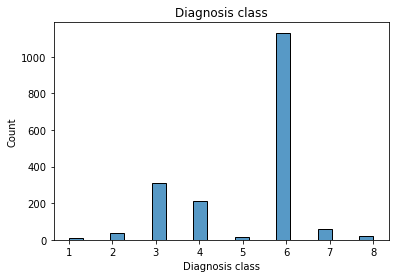

6    1132
3     309
4     212
7      59
2      35
8      21
5      17
1       9
Name: Diagnosis class, dtype: int64

In [53]:
hist_plot('Diagnosis class')

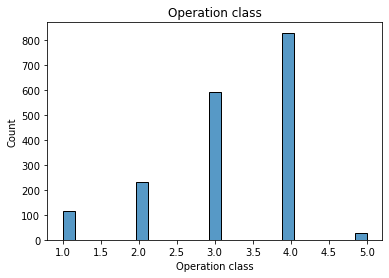

4    829
3    592
2    231
1    116
5     26
Name: Operation class, dtype: int64

In [54]:
hist_plot('Operation class')

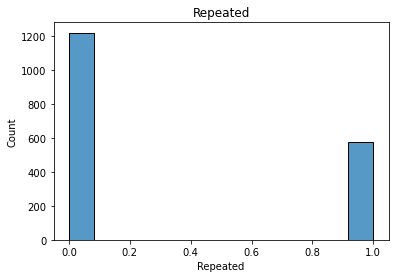

0    1218
1     576
Name: Repeated, dtype: int64

In [55]:
hist_plot('Repeated')

In [56]:
data['Ultrasound of veins a/o'].value_counts(dropna=False)

Не выявлено    1018
NaN             631
Д+              132
Д++               8
П+                3
П++               2
Name: Ultrasound of veins a/o, dtype: int64

In [57]:
data

,Full name,Date of birth,Age,Sex,Date of enter,Code of diagnosis,Diagnosis,Additional diagnoses,D-dimer,Urea,...,ИБС,Системные заболевания,ХСН,ВБВ,ХБП,Эндокринология,ЖКТ,Аритмия,Неврология,ДН
1,ВЯЗКОВ МИХАИЛ ЕВГЕНЬЕВИЧ,17.10.14,7,мужской,27.10.21,M95.8,Деформация головки левой бедренной кости на фо...,NaN,NaN,3.40,...,0,0,0,0,0,0,0,0,0,0
2,МОЛОФЕЕВА НИНА НИКОЛАЕВНА,30.07.54,67,женский,29.10.21,M17.1,Правосторонний гонартроз III ст. с варусной д...,"Гипертоническая болезнь II стадии ,контролируе...",355.0,NaN,...,1,0,0,0,1,1,0,0,0,0
3,ЯШИНА ТАТЬЯНА МИХАЙЛОВНА,31.01.56,65,женский,29.10.21,M17.1,Правосторонний гонартроз III ст. с выраженной ...,Варикозная болезнь вен правой нижней конечност...,253.0,6.00,...,0,0,0,0,0,0,0,0,0,0
4,РАВЗУТДИНОВА ГУЛЬСАРА СОЛТАНОВНА,06.05.62,59,женский,29.10.21,M51.1,Остеохондроз поясничного отдела позвоночника. ...,Варикозная болезнь вен нижних конечностей без...,1228.0,NaN,...,0,0,0,0,0,0,0,1,0,0
5,РОМАНОВ СЕРГЕЙ ГЕРАРДОВИЧ,05.12.59,61,мужской,29.10.21,S72.1,Закрытый чрезвертельный перелом левой бедренно...,"Хронический бронхит, вне обострения.*",2581.0,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,ГОРДЕЕВ ЮРИЙ ИВАНОВИЧ,06.06.70,51,мужской,31.01.22,M17.3,Левосторонний посттравматический гонартроз I с...,Варикозная болезнь вен нижних конечностей. Сос...,423.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1791,ФОМИН АЛЕКСАНДР АНАТОЛЬЕВИЧ,16.05.82,39,мужской,31.01.22,M51.1,Грыжа диска L5-S1. Вертеброгенный болевой синд...,Неатрофический гастрит. Эрозивный дуоденит. Ру...,162.0,3.60,...,0,0,0,0,0,0,1,0,0,0
1792,АНИСИМОВА НИНА НИКОЛАЕВНА,10.04.51,70,женский,31.01.22,G56.0,Компрессионно-ишемическая невропатия срединног...,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1793,ЛИСОВ ДМИТРИЙ АЛЕКСАНДРОВИЧ,18.02.08,13,мужской,31.01.22,Q74.2,Врожденная двусторонняя косолапость. Состояние...,NaN,261.0,2.26,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data['Date of enter'] = pd.to_datetime(data['Date of enter'], dayfirst=True)
data['Date of operation'] = pd.to_datetime(data['Date of operation'], dayfirst=True)
date_diff = data['Date of operation'] - data['Date of enter']
data['Pre-operation days'] = date_diff

In [59]:
data.columns

Index(['Full name', 'Date of birth', 'Age', 'Sex', 'Date of enter',
       'Code of diagnosis', 'Diagnosis', 'Additional diagnoses', 'D-dimer',
       'Urea', 'Creatinine', 'CRP', 'Date of operation', 'Code of operation',
       'Operation', 'Duration (min)', 'Ultrasound of veins a/o',
       'Diagnosis class', 'Operation class', 'Repeated', 'ГБ', 'ИБС',
       'Системные заболевания', 'ХСН', 'ВБВ', 'ХБП', 'Эндокринология', 'ЖКТ',
       'Аритмия', 'Неврология', 'ДН', 'Pre-operation days'],
      dtype='object')

In [60]:
data.describe()

,Age,D-dimer,Urea,Creatinine,CRP,Duration (min),Diagnosis class,Operation class,Repeated,ГБ,...,Системные заболевания,ХСН,ВБВ,ХБП,Эндокринология,ЖКТ,Аритмия,Неврология,ДН,Pre-operation days
count,1794.000000,1654.00,425.000000,435.000000,163.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,...,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794
mean,53.473802,inf,5.460753,81.797701,12.962577,72.388517,5.190635,3.232999,0.321070,0.008361,...,0.041806,0.187291,0.001115,0.052397,0.039019,0.164994,0.124861,0.104236,0.049052,1 days 01:49:09.832775919
std,18.728269,NaN,1.949030,16.273380,24.216809,416.046456,1.376806,0.923935,0.467018,0.091082,...,0.200201,0.390254,0.033380,0.222888,0.193694,0.371279,0.330653,0.305652,0.216038,1 days 00:43:00.218525654
min,1.000000,18.00,2.260000,38.000000,0.100000,-10035.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,45.000000,187.00,4.100000,72.000000,1.450000,45.000000,4.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,59.000000,342.00,5.100000,81.000000,3.600000,60.000000,6.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1 days 00:00:00
75%,67.000000,620.75,6.600000,90.500000,8.050000,74.750000,6.000000,4.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1 days 00:00:00
max,94.000000,inf,16.400000,159.000000,143.000000,10165.000000,8.000000,5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8 days 00:00:00


In [61]:
anomaly_duration = data[abs(data['Duration (min)']) > 500]
anomaly_duration[['Full name', 'Date of birth', 'Age', 'Diagnosis', 'Duration (min)']]

,Full name,Date of birth,Age,Diagnosis,Duration (min)
1179,ТАЙМАНОВА ЛАРИСА АНАТОЛЬЕВНА,08.02.67,54,Повреждение медиального мениска левого коленно...,1465
1272,САУШКИНА ТАТЬЯНА БОРИСОВНА,17.09.63,58,Правосторонний гонартроз III ст. с выраженной ...,10165
1430,КРЫМЗОВА ЕКАТЕРИНА АЛЕКСЕЕВНА,31.01.01,20,Правосторонний посттравматический гонартроз 0-...,-10035
1467,БАЙМУЛКИН АЛЕКСЕЙ МИХАЙЛОВИЧ,08.03.87,34,Левосторонний посттравматический гонартроз I с...,10140


In [62]:
data.drop([1179, 1272, 1430, 1467], inplace=True)

In [63]:
data_to_plot = data[['Age', 'Sex', 'D-dimer', 'Urea', 'Creatinine',
                     'CRP', 'Diagnosis class', 'Operation class',
                     'Repeated', 'Pre-operation days', 'Duration (min)',
                     'ГБ', 'ИБС', 'Системные заболевания', 'ХСН', 'ВБВ',
                     'ХБП', 'Эндокринология', 'ЖКТ', 'Аритмия', 'Неврология', 'ДН']].copy()
data_to_plot['Ultrasound of veins a/o'] = data['Ultrasound of veins a/o'].copy()
data_to_plot = data_to_plot.dropna(subset=['Ultrasound of veins a/o']).reset_index(drop=True)
data_to_plot

,Age,Sex,D-dimer,Urea,Creatinine,CRP,Diagnosis class,Operation class,Repeated,Pre-operation days,...,Системные заболевания,ХСН,ВБВ,ХБП,Эндокринология,ЖКТ,Аритмия,Неврология,ДН,Ultrasound of veins a/o
0,67,женский,355.0,NaN,NaN,NaN,6,4,1,3 days,...,0,0,0,1,1,0,0,0,0,Не выявлено
1,65,женский,253.0,6.0,89.0,NaN,6,4,1,3 days,...,0,0,0,0,0,0,0,0,0,Не выявлено
2,67,женский,437.0,5.3,63.0,NaN,6,4,1,3 days,...,0,0,0,0,0,0,0,0,0,Не выявлено
3,55,мужской,281.0,NaN,NaN,NaN,6,3,0,3 days,...,0,0,0,0,0,0,0,0,0,Не выявлено
4,73,женский,782.0,NaN,NaN,NaN,6,3,0,3 days,...,0,1,0,0,0,0,1,0,0,Не выявлено
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,75,женский,526.0,NaN,NaN,NaN,6,4,1,3 days,...,0,0,0,0,0,0,0,0,0,Не выявлено
1155,72,женский,NaN,NaN,NaN,NaN,6,4,1,3 days,...,0,0,0,0,0,0,0,0,0,П+
1156,59,женский,385.0,NaN,NaN,NaN,6,4,1,3 days,...,0,0,0,0,0,0,0,0,0,Д+
1157,51,мужской,423.0,NaN,NaN,NaN,6,4,0,0 days,...,0,0,0,0,0,0,0,0,0,Не выявлено


In [64]:
data_to_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Age                      1159 non-null   int64          
 1   Sex                      1159 non-null   object         
 2   D-dimer                  1077 non-null   float64        
 3   Urea                     257 non-null    float64        
 4   Creatinine               262 non-null    float64        
 5   CRP                      115 non-null    float64        
 6   Diagnosis class          1159 non-null   int64          
 7   Operation class          1159 non-null   int64          
 8   Repeated                 1159 non-null   int64          
 9   Pre-operation days       1159 non-null   timedelta64[ns]
 10  Duration (min)           1159 non-null   int64          
 11  ГБ                       1159 non-null   int64          
 12  ИБС                 

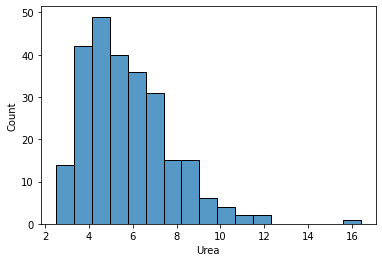

In [65]:
sns.histplot(data_to_plot['Urea'])
plt.show()

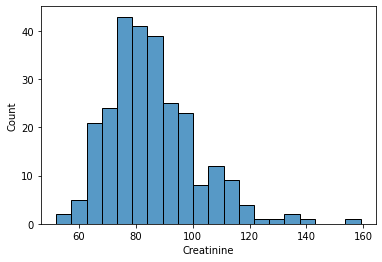

In [66]:
sns.histplot(data_to_plot['Creatinine'])
plt.show()

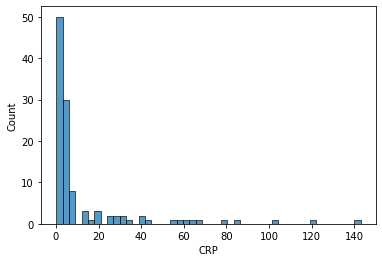

In [67]:
sns.histplot(data_to_plot['CRP'])
plt.show()

In [68]:
data_to_plot = data_to_plot.drop(['Urea', 'Creatinine', 'CRP'], axis=1)

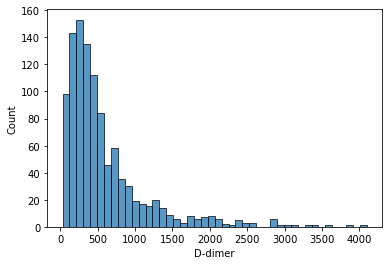

In [69]:
sns.histplot(data_to_plot[data_to_plot['D-dimer'] != np.inf]['D-dimer'])
plt.show()

In [70]:
data_to_plot['D-dimer'] = data_to_plot['D-dimer'].apply(lambda x: x if x != np.inf else 5000)

In [71]:
data_to_plot['Sex'] = pd.get_dummies(data_to_plot['Sex'], drop_first=True)
data_to_plot

,Age,Sex,D-dimer,Diagnosis class,Operation class,Repeated,Pre-operation days,Duration (min),ГБ,ИБС,Системные заболевания,ХСН,ВБВ,ХБП,Эндокринология,ЖКТ,Аритмия,Неврология,ДН,Ultrasound of veins a/o
0,67,0,355.0,6,4,1,3 days,100,0,1,0,0,0,1,1,0,0,0,0,Не выявлено
1,65,0,253.0,6,4,1,3 days,85,0,0,0,0,0,0,0,0,0,0,0,Не выявлено
2,67,0,437.0,6,4,1,3 days,77,0,0,0,0,0,0,0,0,0,0,0,Не выявлено
3,55,1,281.0,6,3,0,3 days,65,0,0,0,0,0,0,0,0,0,0,0,Не выявлено
4,73,0,782.0,6,3,0,3 days,60,0,0,0,1,0,0,0,0,1,0,0,Не выявлено
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,75,0,526.0,6,4,1,3 days,70,0,1,0,0,0,0,0,0,0,0,0,Не выявлено
1155,72,0,NaN,6,4,1,3 days,120,0,0,0,0,0,0,0,0,0,0,0,П+
1156,59,0,385.0,6,4,1,3 days,120,0,0,0,0,0,0,0,0,0,0,0,Д+
1157,51,1,423.0,6,4,0,0 days,95,0,0,0,0,0,0,0,0,0,0,0,Не выявлено


In [72]:
data_to_plot['Pre-operation days'] = data_to_plot['Pre-operation days'].astype(str).apply(lambda x: x[0]).astype(int)

In [73]:
data_to_plot_numeric = data_to_plot.copy()

In [74]:
data_to_plot_numeric['Ultrasound of veins a/o'].value_counts()

Не выявлено    1014
Д+              132
Д++               8
П+                3
П++               2
Name: Ultrasound of veins a/o, dtype: int64

In [75]:
uzi_encoding = {
    'Не выявлено': 0,
    'Д+': 1,
    'Д++': 2,
    'П+': 3,
    'П++': 4
}

data_to_plot_numeric['Ultrasound of veins a/o'] = data_to_plot_numeric['Ultrasound of veins a/o'].map(uzi_encoding)

In [76]:
data_to_plot_numeric

,Age,Sex,D-dimer,Diagnosis class,Operation class,Repeated,Pre-operation days,Duration (min),ГБ,ИБС,Системные заболевания,ХСН,ВБВ,ХБП,Эндокринология,ЖКТ,Аритмия,Неврология,ДН,Ultrasound of veins a/o
0,67,0,355.0,6,4,1,3,100,0,1,0,0,0,1,1,0,0,0,0,0
1,65,0,253.0,6,4,1,3,85,0,0,0,0,0,0,0,0,0,0,0,0
2,67,0,437.0,6,4,1,3,77,0,0,0,0,0,0,0,0,0,0,0,0
3,55,1,281.0,6,3,0,3,65,0,0,0,0,0,0,0,0,0,0,0,0
4,73,0,782.0,6,3,0,3,60,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,75,0,526.0,6,4,1,3,70,0,1,0,0,0,0,0,0,0,0,0,0
1155,72,0,NaN,6,4,1,3,120,0,0,0,0,0,0,0,0,0,0,0,3
1156,59,0,385.0,6,4,1,3,120,0,0,0,0,0,0,0,0,0,0,0,1
1157,51,1,423.0,6,4,0,0,95,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
diagnosis_classes_meanings = {
    1: 'Бактериальные воспалительные-гнойные заболевания',
    2: 'Воспалительные заболевания различной локализации',
    3: 'Травмы, механические повреждения опорнодвигательного аппарата без острого воспаления',
    4: 'Нейро-травмы, заболевания позвоночника, патология периферических нервов',
    5: 'Местная патология, несистемные болезни не классифицированные в других рубриках',
    6: 'Дегенеративные прогрессирующие заболевания суставов, осложнения эндопротезирований',
    7: 'Cистемные заболевания, наследственные заболевания',
    8: 'Сосудистая патология'
}

data_to_plot = pd.concat([data_to_plot, pd.get_dummies(data_to_plot['Diagnosis class'].map(diagnosis_classes_meanings), drop_first=True)],
          axis=1).drop('Diagnosis class', axis=1)
data_to_plot

,Age,Sex,D-dimer,Operation class,Repeated,Pre-operation days,Duration (min),ГБ,ИБС,Системные заболевания,...,Неврология,ДН,Ultrasound of veins a/o,Бактериальные воспалительные-гнойные заболевания,Воспалительные заболевания различной локализации,"Дегенеративные прогрессирующие заболевания суставов, осложнения эндопротезирований","Местная патология, несистемные болезни не классифицированные в других рубриках","Нейро-травмы, заболевания позвоночника, патология периферических нервов",Сосудистая патология,"Травмы, механические повреждения опорнодвигательного аппарата без острого воспаления"
0,67,0,355.0,4,1,3,100,0,1,0,...,0,0,Не выявлено,0,0,1,0,0,0,0
1,65,0,253.0,4,1,3,85,0,0,0,...,0,0,Не выявлено,0,0,1,0,0,0,0
2,67,0,437.0,4,1,3,77,0,0,0,...,0,0,Не выявлено,0,0,1,0,0,0,0
3,55,1,281.0,3,0,3,65,0,0,0,...,0,0,Не выявлено,0,0,1,0,0,0,0
4,73,0,782.0,3,0,3,60,0,0,0,...,0,0,Не выявлено,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,75,0,526.0,4,1,3,70,0,1,0,...,0,0,Не выявлено,0,0,1,0,0,0,0
1155,72,0,NaN,4,1,3,120,0,0,0,...,0,0,П+,0,0,1,0,0,0,0
1156,59,0,385.0,4,1,3,120,0,0,0,...,0,0,Д+,0,0,1,0,0,0,0
1157,51,1,423.0,4,0,0,95,0,0,0,...,0,0,Не выявлено,0,0,1,0,0,0,0


In [78]:
operation_classes_meanings = {
    1: 'Операции на структурах верхнего плечевого пояса и верхних конечностей',
    2: 'Операции нейрохирургического профиля на позвоночнике',
    3: 'Операции на ТБС, структурах в области тазобедренного сустава или бедренной кости',
    4: 'Операции на структурах, расположенных дистальнее бедренной кости',
    5: 'Операции на венах нижних конечностей',
}

data_to_plot = pd.concat([data_to_plot, pd.get_dummies(data_to_plot['Operation class'].map(operation_classes_meanings), drop_first=True)],
                         axis=1).drop('Operation class', axis=1)
data_to_plot

,Age,Sex,D-dimer,Repeated,Pre-operation days,Duration (min),ГБ,ИБС,Системные заболевания,ХСН,...,Воспалительные заболевания различной локализации,"Дегенеративные прогрессирующие заболевания суставов, осложнения эндопротезирований","Местная патология, несистемные болезни не классифицированные в других рубриках","Нейро-травмы, заболевания позвоночника, патология периферических нервов",Сосудистая патология,"Травмы, механические повреждения опорнодвигательного аппарата без острого воспаления",Операции на венах нижних конечностей,Операции на структурах верхнего плечевого пояса и верхних конечностей,"Операции на структурах, расположенных дистальнее бедренной кости",Операции нейрохирургического профиля на позвоночнике
0,67,0,355.0,1,3,100,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,65,0,253.0,1,3,85,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,67,0,437.0,1,3,77,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,55,1,281.0,0,3,65,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,73,0,782.0,0,3,60,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,75,0,526.0,1,3,70,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1155,72,0,NaN,1,3,120,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1156,59,0,385.0,1,3,120,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1157,51,1,423.0,0,0,95,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [79]:
data_to_plot = pd.concat([data_to_plot, pd.get_dummies(data_to_plot['Ultrasound of veins a/o'], drop_first=True, prefix='Тромбоз:', prefix_sep=' ')],
                         axis=1).drop('Ultrasound of veins a/o', axis=1)

In [80]:
data_to_plot

,Age,Sex,D-dimer,Repeated,Pre-operation days,Duration (min),ГБ,ИБС,Системные заболевания,ХСН,...,Сосудистая патология,"Травмы, механические повреждения опорнодвигательного аппарата без острого воспаления",Операции на венах нижних конечностей,Операции на структурах верхнего плечевого пояса и верхних конечностей,"Операции на структурах, расположенных дистальнее бедренной кости",Операции нейрохирургического профиля на позвоночнике,Тромбоз: Д++,Тромбоз: Не выявлено,Тромбоз: П+,Тромбоз: П++
0,67,0,355.0,1,3,100,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,65,0,253.0,1,3,85,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,67,0,437.0,1,3,77,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,55,1,281.0,0,3,65,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,73,0,782.0,0,3,60,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,75,0,526.0,1,3,70,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1155,72,0,NaN,1,3,120,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1156,59,0,385.0,1,3,120,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1157,51,1,423.0,0,0,95,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [81]:
data_to_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 32 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Age                                                                                   1159 non-null   int64  
 1   Sex                                                                                   1159 non-null   uint8  
 2   D-dimer                                                                               1077 non-null   float64
 3   Repeated                                                                              1159 non-null   int64  
 4   Pre-operation days                                                                    1159 non-null   int32  
 5   Duration (min)                                                                     

In [82]:
from sklearn.neighbors import LocalOutlierFactor

loc_factor = LocalOutlierFactor(metric='mahalanobis', n_jobs=-1)

loc_pred = pd.Series(loc_factor.fit_predict(data_to_plot.fillna(data_to_plot.median())))
loc_pred.value_counts()

 1    1004
-1     155
dtype: int64

In [83]:
print(f"Количество дубликатов: {len(data_to_plot.loc[data_to_plot.duplicated(), :].index)}")
print(f"Индексы дубликатов: {data_to_plot.loc[data_to_plot.duplicated(), :].index}")

Количество дубликатов: 0
Индексы дубликатов: Int64Index([], dtype='int64')


## Первичный анализ

In [84]:
data_to_plot_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1159 non-null   int64  
 1   Sex                      1159 non-null   uint8  
 2   D-dimer                  1077 non-null   float64
 3   Diagnosis class          1159 non-null   int64  
 4   Operation class          1159 non-null   int64  
 5   Repeated                 1159 non-null   int64  
 6   Pre-operation days       1159 non-null   int32  
 7   Duration (min)           1159 non-null   int64  
 8   ГБ                       1159 non-null   int64  
 9   ИБС                      1159 non-null   int64  
 10  Системные заболевания    1159 non-null   int64  
 11  ХСН                      1159 non-null   int64  
 12  ВБВ                      1159 non-null   int64  
 13  ХБП                      1159 non-null   int64  
 14  Эндокринология          

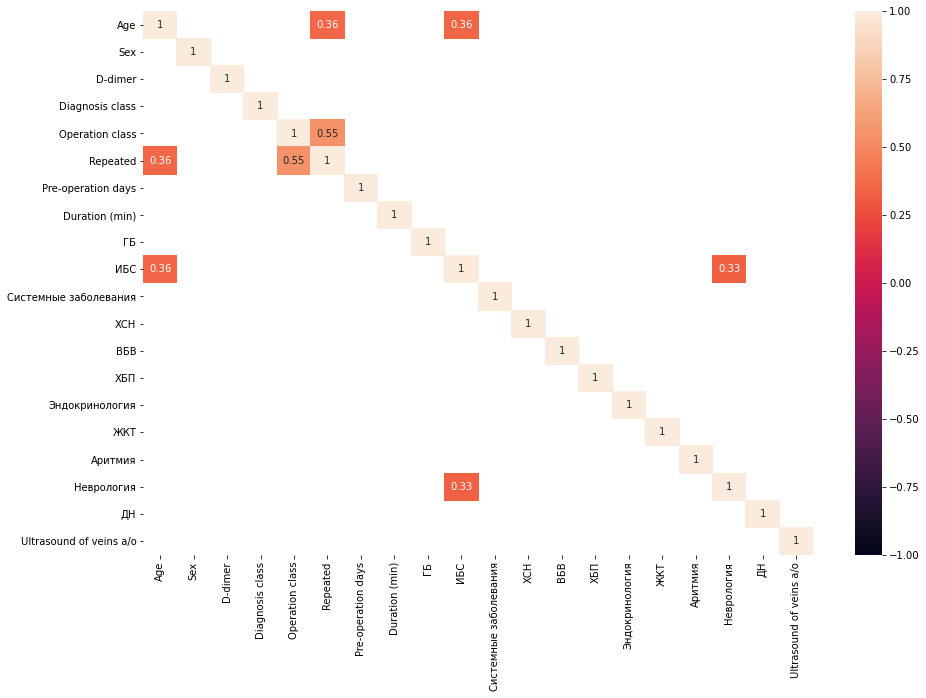

In [85]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(data_to_plot_numeric.corr()[abs(data_to_plot_numeric.corr())>=0.3], annot=True, vmin=-1, vmax=1)
plt.show()

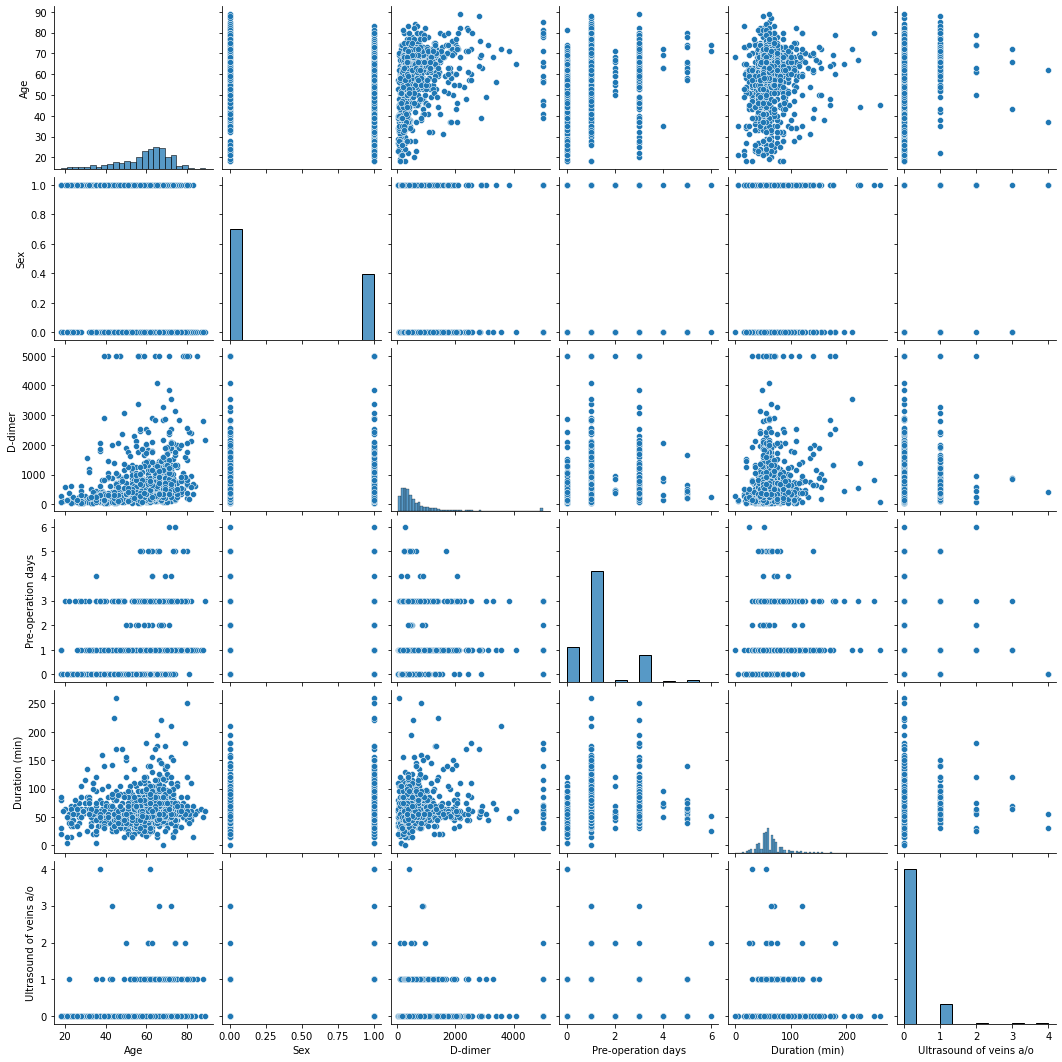

In [86]:
sns.pairplot(data_to_plot_numeric[['Age', 'Sex', 'D-dimer', 'Pre-operation days', 'Duration (min)', 'Ultrasound of veins a/o']])

In [87]:
data_to_plot_numeric.describe()

,Age,Sex,D-dimer,Diagnosis class,Operation class,Repeated,Pre-operation days,Duration (min),ГБ,ИБС,Системные заболевания,ХСН,ВБВ,ХБП,Эндокринология,ЖКТ,Аритмия,Неврология,ДН,Ultrasound of veins a/o
count,1159.000000,1159.000000,1077.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000
mean,59.037964,0.373598,650.511142,5.616048,3.439172,0.414150,1.182053,63.602243,0.009491,0.180328,0.041415,0.223469,0.001726,0.059534,0.045729,0.188956,0.149267,0.112166,0.056946,0.142364
std,12.906343,0.483968,783.599900,1.109755,0.727846,0.492787,1.010560,26.016662,0.097000,0.384626,0.199334,0.416750,0.041523,0.236724,0.208987,0.391643,0.356505,0.315706,0.231839,0.415076
min,18.000000,0.000000,32.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,0.000000,237.000000,6.000000,3.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.000000,0.000000,407.000000,6.000000,4.000000,0.000000,1.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.000000,1.000000,729.000000,6.000000,4.000000,1.000000,1.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,1.000000,5000.000000,8.000000,5.000000,1.000000,6.000000,260.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


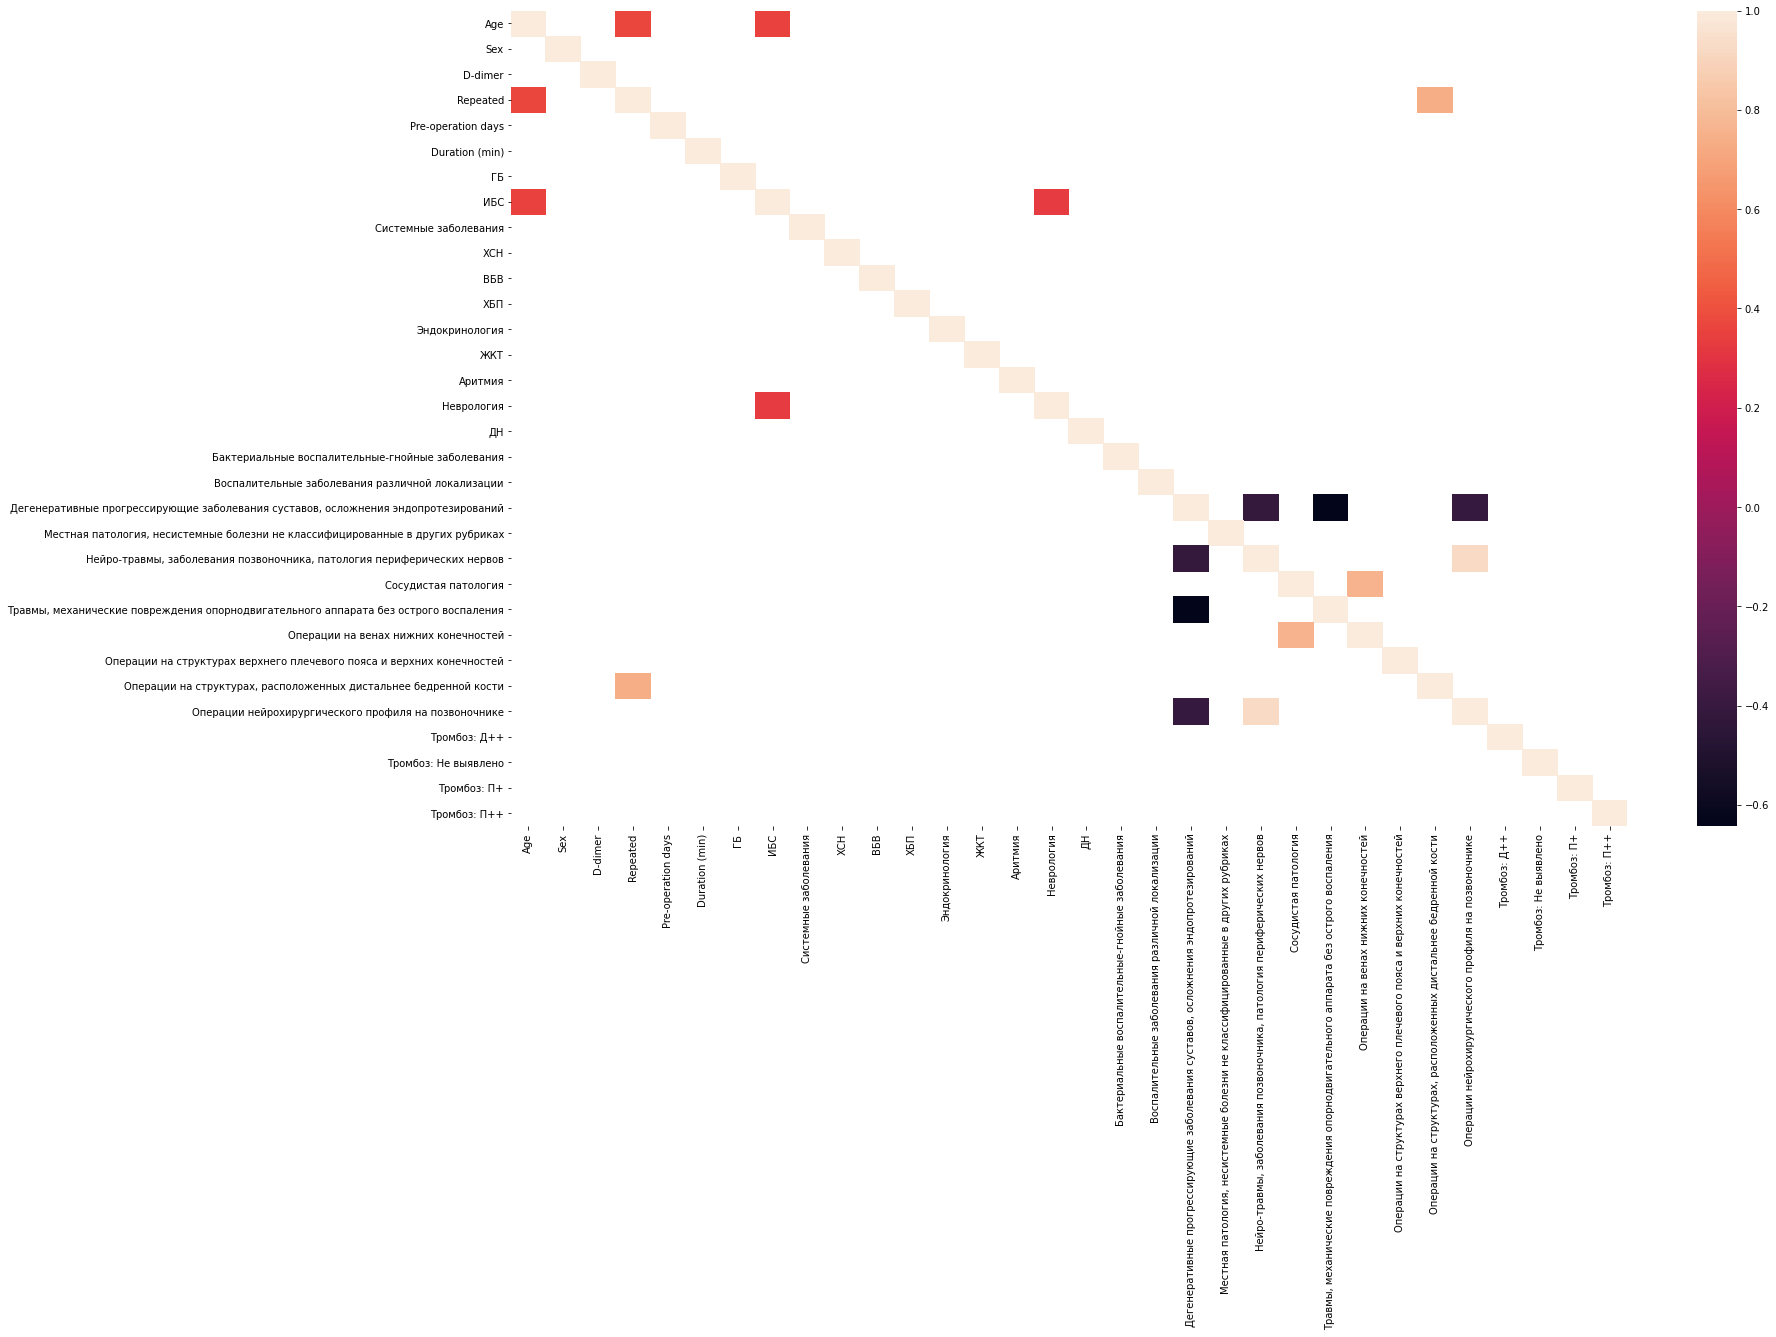

In [88]:
plt.figure(figsize=(25,15))
ax = sns.heatmap(data_to_plot.corr()[abs(data_to_plot.corr())>=0.3])
plt.show()

## Решающие деревья

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                     ('std_scaler', StandardScaler()),
                     ])

In [91]:
X_train_raw = data_to_plot.drop(['Тромбоз: Не выявлено', 'Тромбоз: П+', 'Тромбоз: П++', 'Тромбоз: Д++'], axis=1)
y_train = data_to_plot_numeric['Ultrasound of veins a/o'].copy()

In [92]:
X_train_raw

,Age,Sex,D-dimer,Repeated,Pre-operation days,Duration (min),ГБ,ИБС,Системные заболевания,ХСН,...,Воспалительные заболевания различной локализации,"Дегенеративные прогрессирующие заболевания суставов, осложнения эндопротезирований","Местная патология, несистемные болезни не классифицированные в других рубриках","Нейро-травмы, заболевания позвоночника, патология периферических нервов",Сосудистая патология,"Травмы, механические повреждения опорнодвигательного аппарата без острого воспаления",Операции на венах нижних конечностей,Операции на структурах верхнего плечевого пояса и верхних конечностей,"Операции на структурах, расположенных дистальнее бедренной кости",Операции нейрохирургического профиля на позвоночнике
0,67,0,355.0,1,3,100,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,65,0,253.0,1,3,85,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,67,0,437.0,1,3,77,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,55,1,281.0,0,3,65,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,73,0,782.0,0,3,60,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,75,0,526.0,1,3,70,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1155,72,0,NaN,1,3,120,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1156,59,0,385.0,1,3,120,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1157,51,1,423.0,0,0,95,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [93]:
y_train.value_counts()

0    1014
1     132
2       8
3       3
4       2
Name: Ultrasound of veins a/o, dtype: int64

In [94]:
y_train_binary = y_train.apply(lambda x: 1 if x > 0 else 0)
y_train_binary.value_counts()

0    1014
1     145
Name: Ultrasound of veins a/o, dtype: int64

In [95]:
X_train = pd.DataFrame(pipeline.fit_transform(X_train_raw), columns=X_train_raw.columns)

In [96]:
def show_importances(model, X):
    importances = model.feature_importances_

    importances_df = pd.DataFrame({"Importances" : importances}, index=X.columns)
    importances_df.index.name = 'Features'
    importances_df = importances_df.sort_values('Importances')

    importances_df.plot.barh(color = 'teal', figsize=(10, 14))
    # display(importances_df)

In [108]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

forest_clf = RandomForestClassifier(random_state=42, n_estimators=20, n_jobs=-2)
extra_clf = ExtraTreesClassifier(random_state=42, n_estimators=20, n_jobs=-2)
cat_clf = CatBoostClassifier(random_state=42, verbose=False, auto_class_weights='Balanced',
                                               learning_rate=0.07, iterations=1500, grow_policy='Depthwise')

In [130]:
from sklearn.model_selection import cross_val_score
from statistics import mean, median

def model_results(model, X_data, y_data, cv=20, scoring='roc_auc'):
    res = cross_val_score(model, X_data, y_data, cv=cv, scoring=scoring)
    print(f"CrossValScores: {res.round(5)}")
    print(f"Mean: {mean(res).round(5)}")
    print(f"Median: {median(res).round(5)}")
    model.fit(X_data, y_data)
    show_importances(model, X_data)

### Бинарная классификация

CrossValScores: [0.61625 0.72129 0.73389 0.65966 0.76611 0.72689 0.7423  0.68908 0.71008
 0.77591 0.64566 0.58964 0.79832 0.76611 0.75875 0.55875 0.71875 0.65875
 0.645   0.63143]
Mean: 0.69563
Median: 0.71442


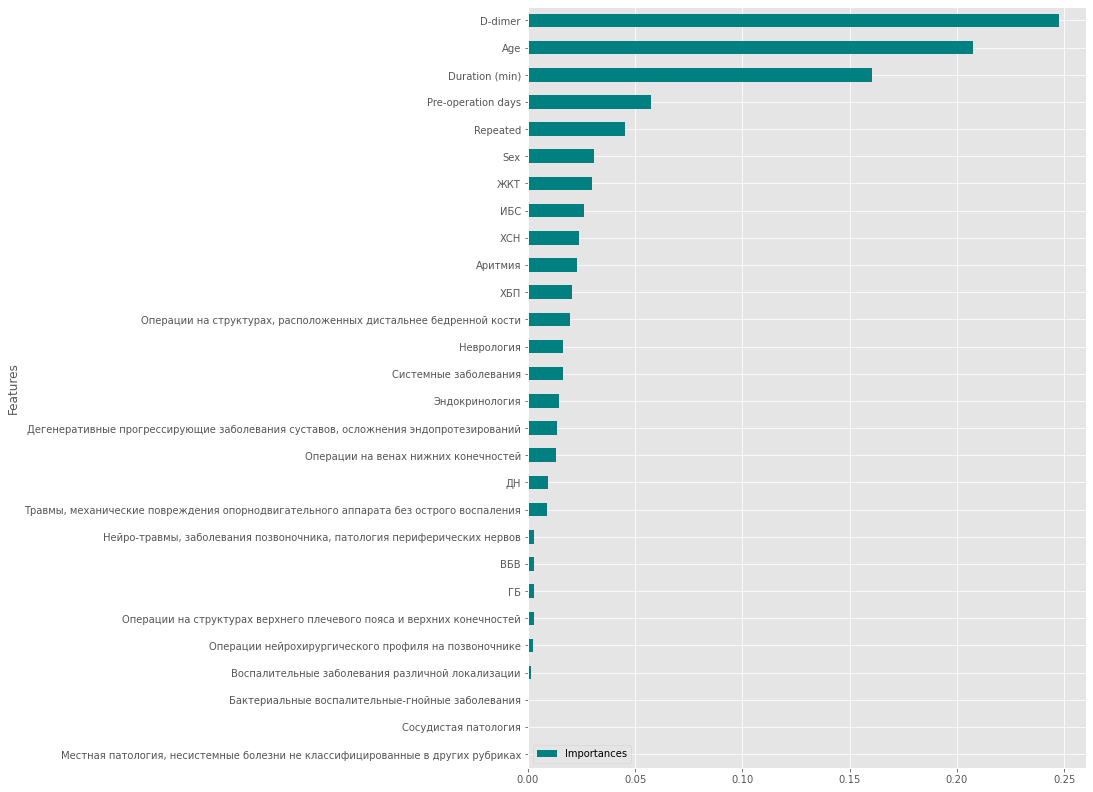

In [121]:
model_results(forest_clf, X_train, y_train_binary)

CrossValScores: [0.67367 0.7465  0.7437  0.71429 0.71849 0.65686 0.7465  0.73529 0.56723
 0.70588 0.64706 0.58263 0.83333 0.71429 0.625   0.53    0.70125 0.7625
 0.655   0.69143]
Mean: 0.68754
Median: 0.70357


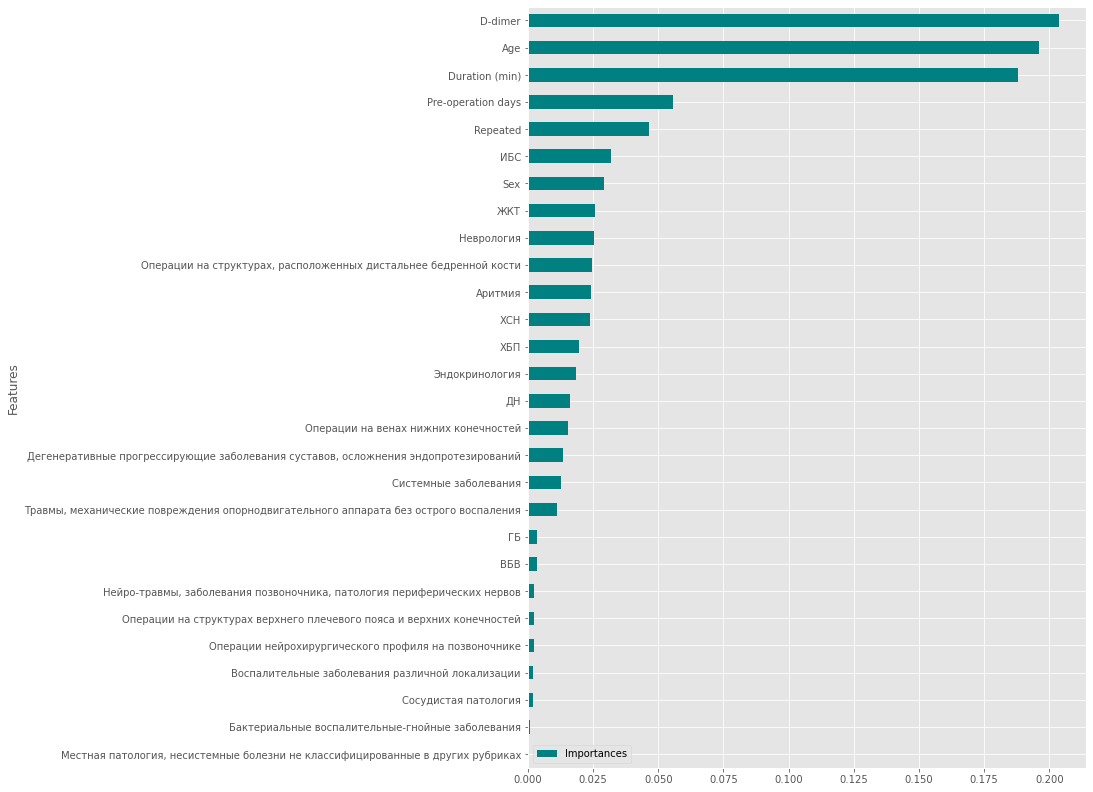

In [122]:
model_results(extra_clf, X_train, y_train_binary)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

CrossValScores: [0.68908 0.71429 0.66947 0.7507  0.63866 0.69748 0.83473 0.7451  0.80112
 0.71148 0.63866 0.7479  0.68067 0.62465 0.6225  0.5425  0.66    0.7
 0.68    0.65429]
Mean: 0.69016
Median: 0.68487


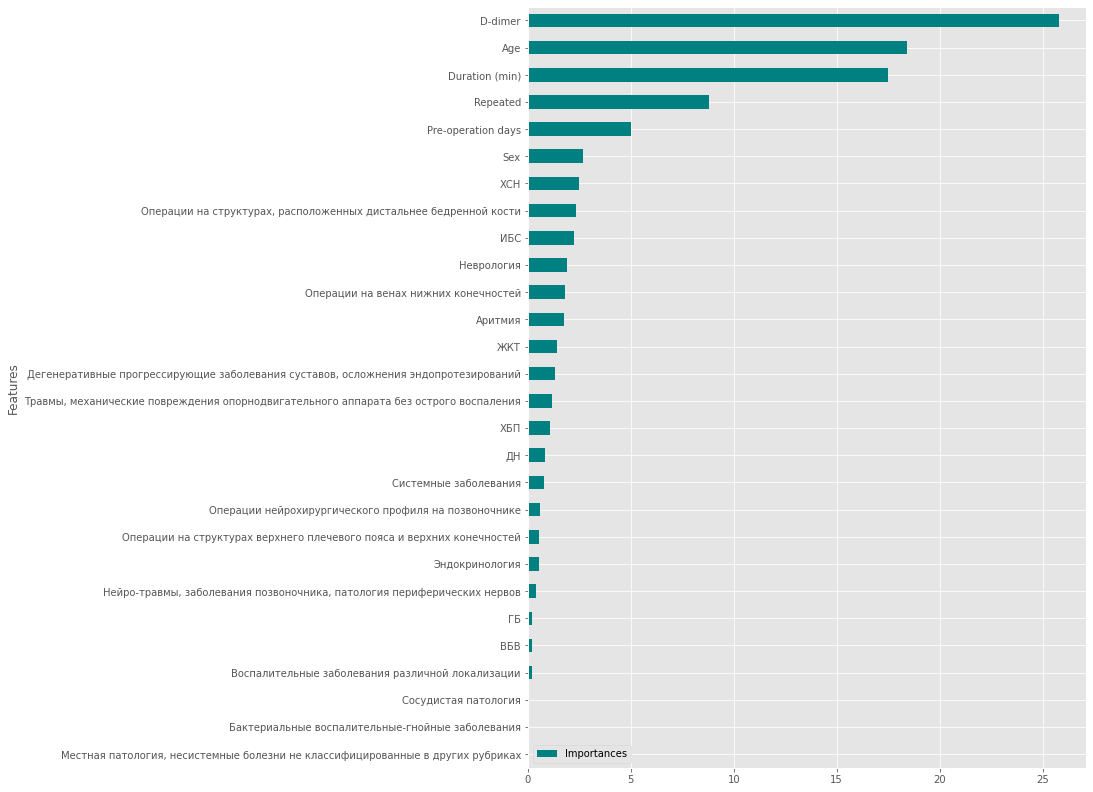

In [123]:
model_results(cat_clf, X_train, y_train_binary)

### Мультиклассовая классификация

CrossValScores: [0.5     0.4902  0.5     0.5     0.5     0.5     0.3268  0.31373 0.38889
 0.33333 0.33333 0.33333 0.38235 0.65359 0.32    0.37429 0.32667 0.36762
 0.33333 0.5    ]
Mean: 0.41387
Median: 0.37832


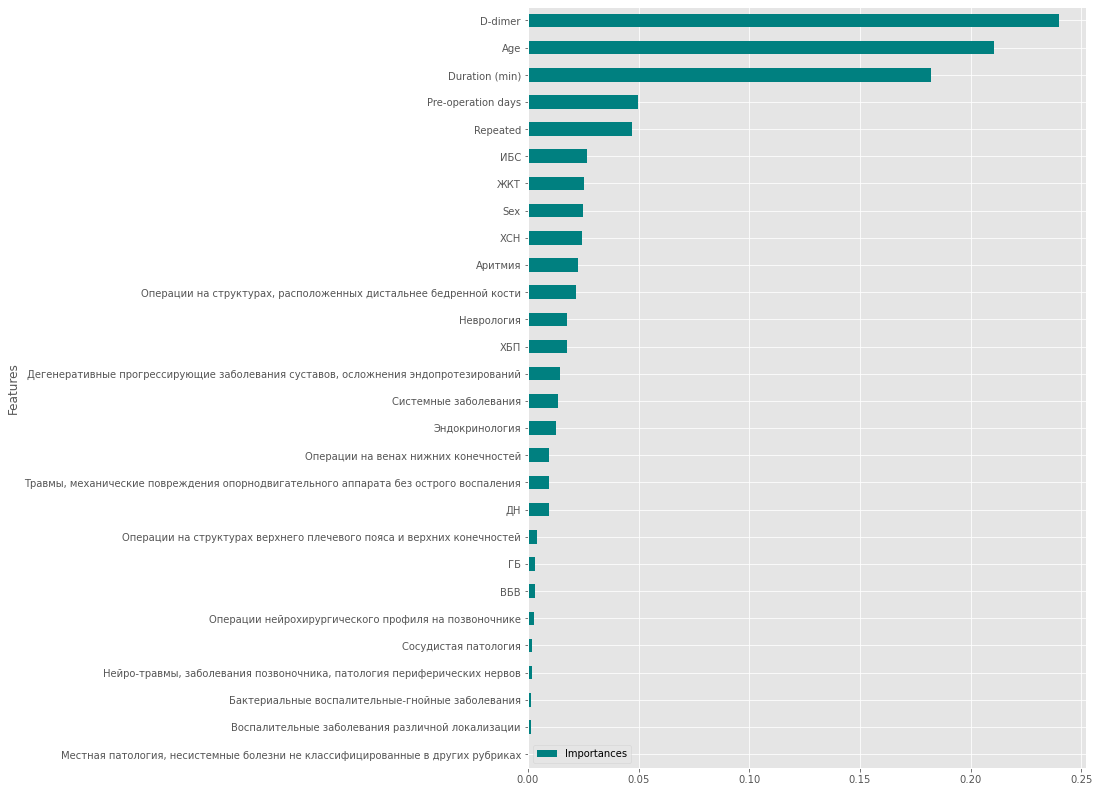

In [133]:
model_results(forest_clf, X_train, y_train, scoring='balanced_accuracy')

CrossValScores: [0.47059 0.61345 0.4902  0.47059 0.48039 0.47059 0.38889 0.36928 0.30719
 0.3268  0.31373 0.33333 0.3268  0.32026 0.28667 0.30667 0.29333 0.36095
 0.36762 0.47   ]
Mean: 0.38837
Median: 0.36429


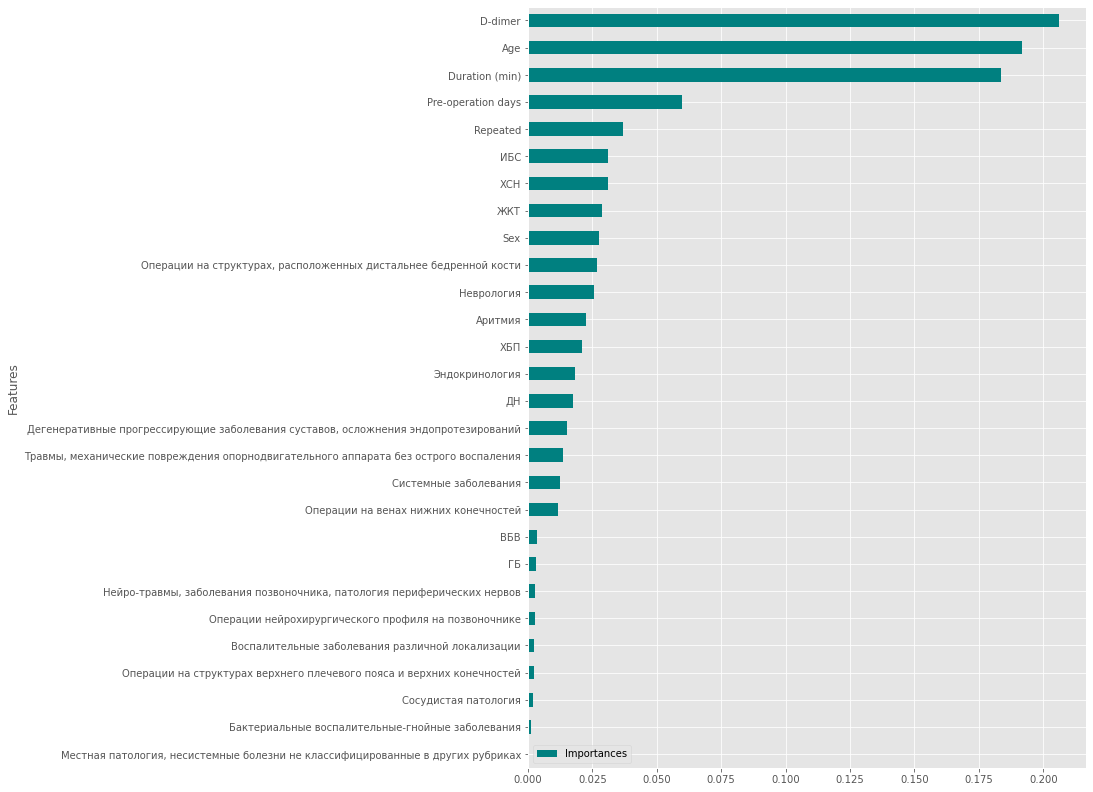

In [134]:
model_results(extra_clf, X_train, y_train, scoring='balanced_accuracy')

CrossValScores: [0.45098 0.61345 0.56162 0.59384 0.45098 0.84734 0.36928 0.3366  0.36928
 0.3268  0.30719 0.30719 0.32026 0.42484 0.34095 0.32095 0.32095 0.42952
 0.3     0.58286]
Mean: 0.42874
Median: 0.36928


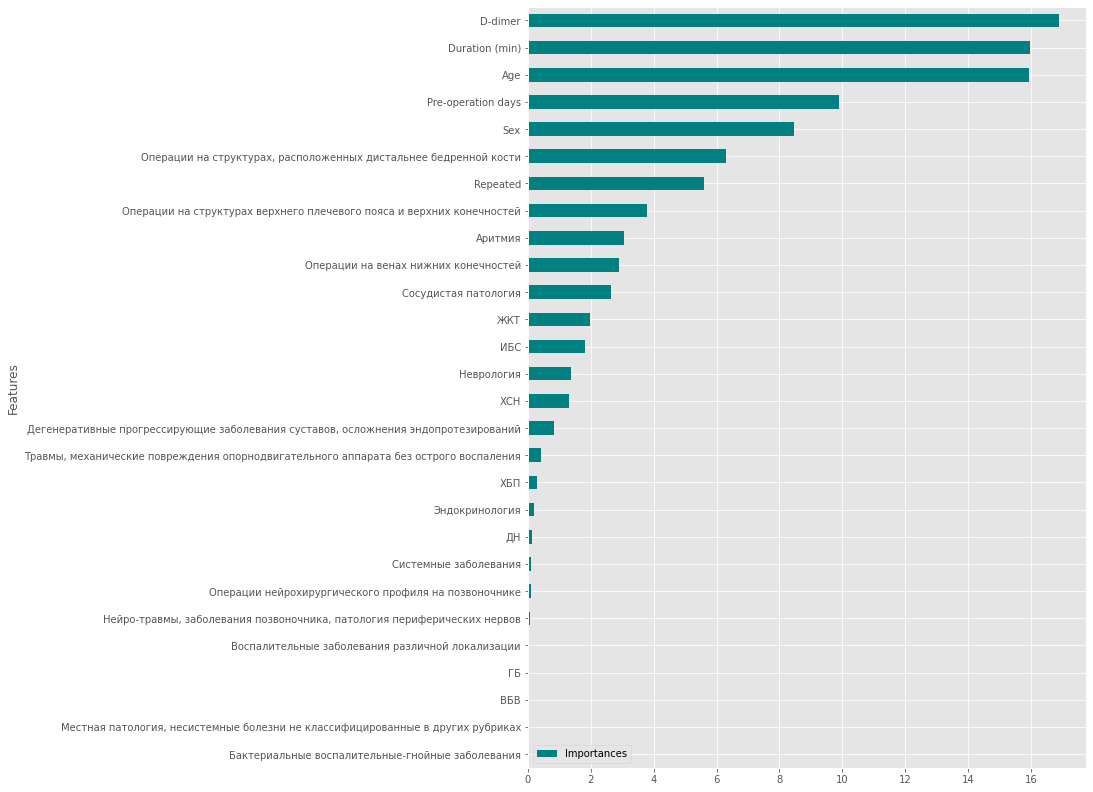

In [135]:
model_results(cat_clf, X_train, y_train, scoring='balanced_accuracy')

## ElPiGraph

#### Все данные

Estimating dimensions
FisherS is ready
Estimating done!


Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
6 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  50  nodes on  1159  points and  6  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1|5||50	3.8518	50	49	35	5	0	0	2.6675	2.6484	0.7774	0.779	1.1549	0.0294	1.4695	73.4751	0


6.0554  seconds elapsed
Removed 1 vertices and 1 edges


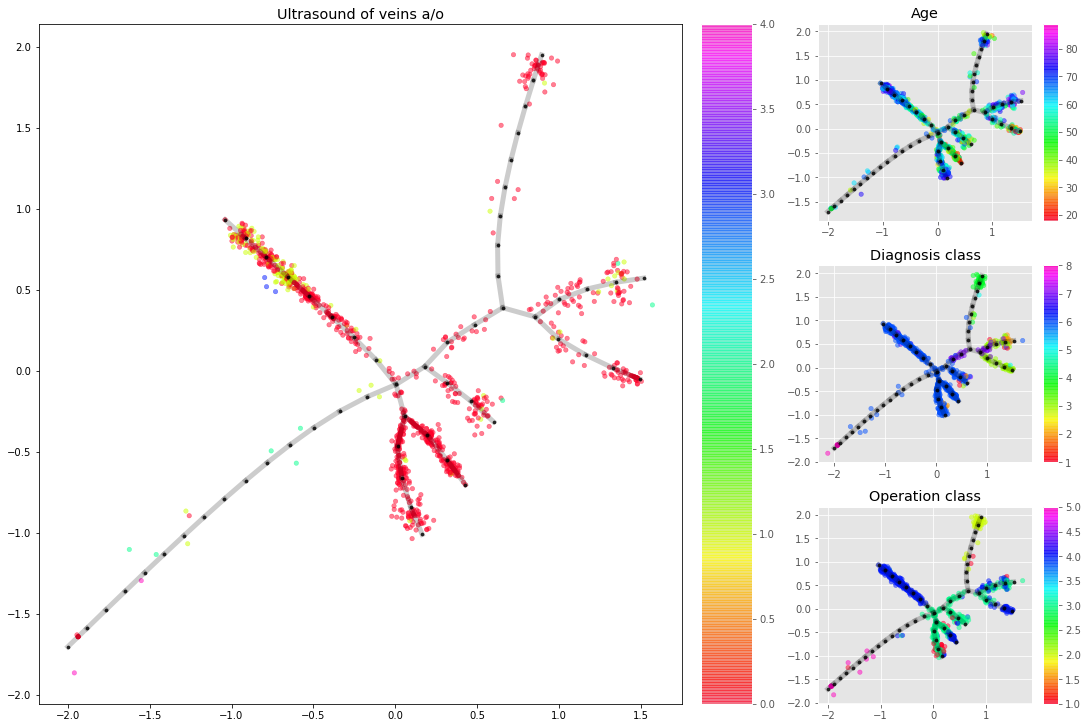

In [104]:
from tree_pipeline import *

numpy_std = pipeline.fit_transform(data_to_plot)
data_std = pd.DataFrame(numpy_std, columns=data_to_plot.columns)

dict_for_tree = plot_tree_pipeline(numpy_std, data_to_plot_numeric, 'Ultrasound of veins a/o', ['Age', 'Diagnosis class', 'Operation class'])

#### Самые важные признаки по мнению деревьев

In [138]:
def plot_by_columns(columns, target_col='Ultrasound of veins a/o', other_cols=None):
    if other_cols is None:
        other_cols = ['Age', 'Diagnosis class', 'Operation class']
    to_pipeline = data_to_plot[columns]

    return plot_tree_pipeline(pipeline.fit_transform(to_pipeline), data_to_plot_numeric, target_col, other_cols)

Estimating dimensions
FisherS is ready
Estimating done!


Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
4 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  50  nodes on  1159  points and  4  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

7||50	1.332	50	49	34	7	0	0	0.9902	0.9849	0.7913	0.7925	0.3304	0.0114	0.5685	28.4264	0


5.9274  seconds elapsed
Removed 5 vertices and 5 edges


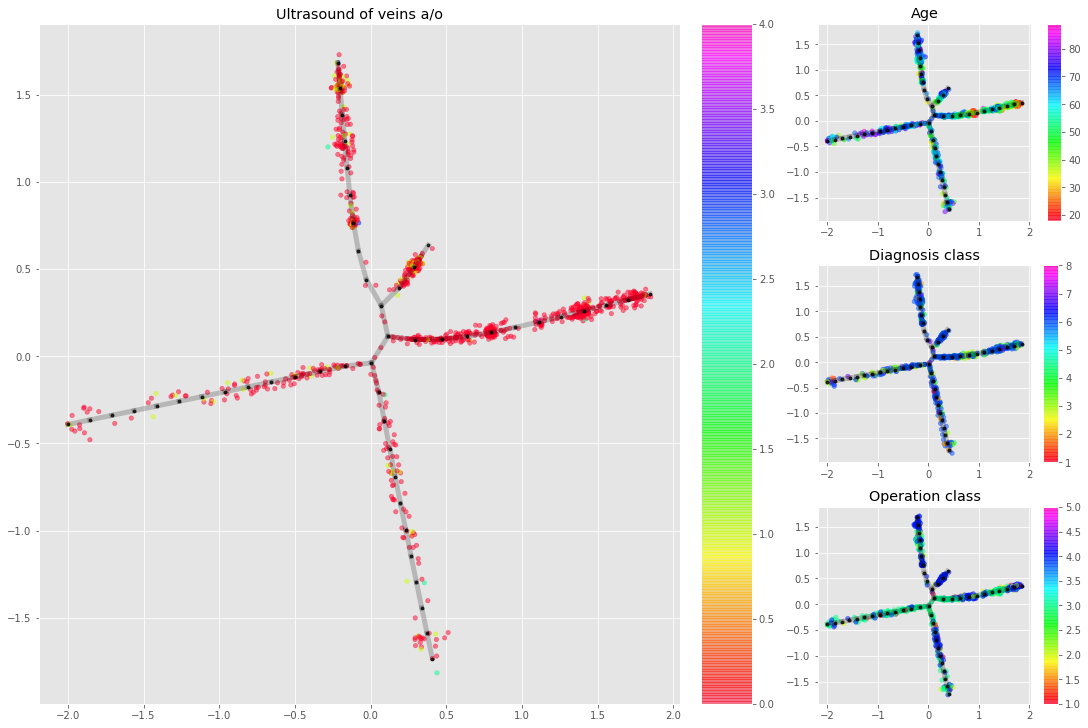

In [140]:
plot_by_columns(['D-dimer', 'Age', 'Duration (min)', 'Pre-operation days', 'Repeated', 'Sex'])
pass

Estimating dimensions
FisherS is ready
Estimating done!


Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
4 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  50  nodes on  1159  points and  4  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

5||50	1.8406	50	49	38	5	0	0	1.3491	1.3399	0.7551	0.7568	0.4864	0.0051	0.2554	12.7721	0


5.443  seconds elapsed
Removed 4 vertices and 4 edges


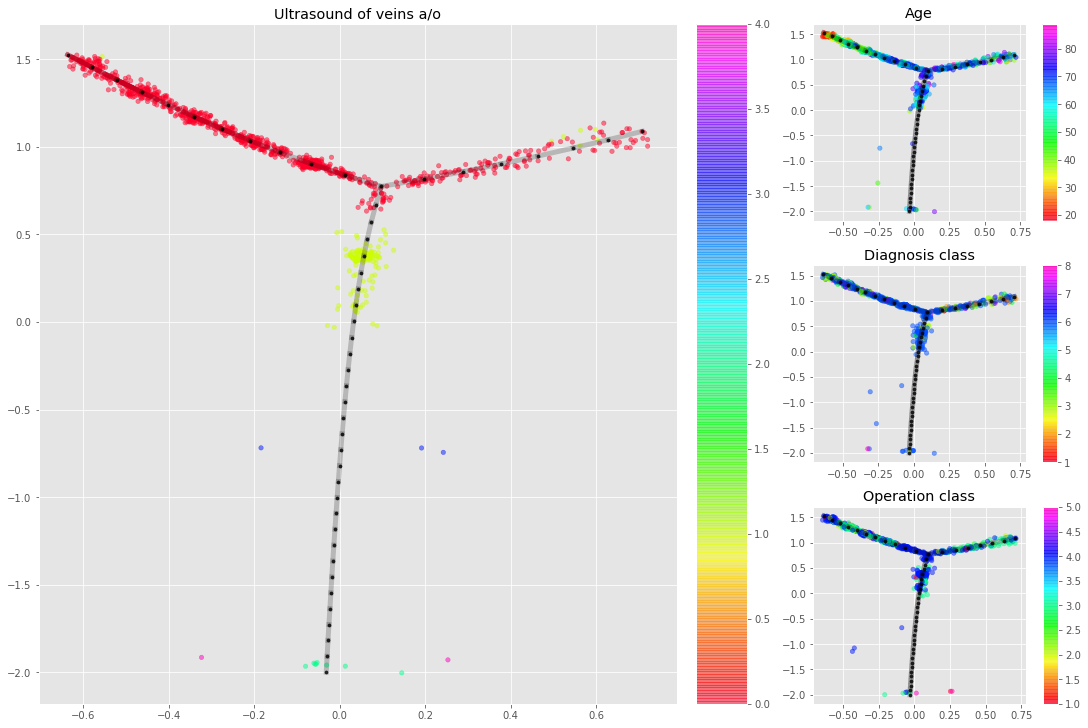

In [143]:
plot_by_columns(['D-dimer', 'Age', 'Duration (min)', 'Pre-operation days', 'Repeated', 'Sex', 'Тромбоз: Д++', 'Тромбоз: Не выявлено', 'Тромбоз: П+', 'Тромбоз: П++'])
pass

#### Все данные без учета узи

Estimating dimensions
FisherS is ready
Estimating done!


Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
6 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  50  nodes on  1159  points and  6  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1|6||50	3.6041	50	49	33	6	0	0	2.394	2.3794	0.7941	0.7954	1.19	0.02	1.0015	50.0766	0


6.4024  seconds elapsed
Removed 1 vertices and 1 edges


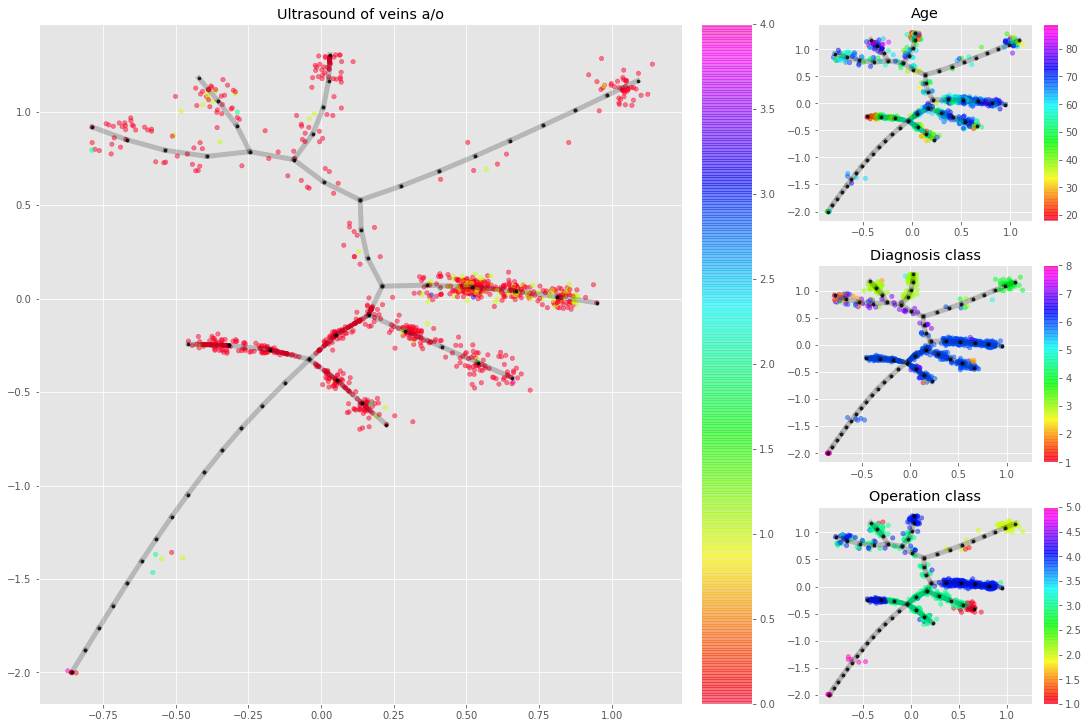

In [148]:
plot_by_columns(data_to_plot.columns[:-4])
pass